# 🧠 Telco Customer Churn — Midterm Exam Assignment

Este cuaderno desarrolla un pipeline completo y avanzado de *Machine Learning* aplicado al problema de **churn en clientes del sector telecomunicaciones**, utilizando el dataset *Telco Customer Churn*. El objetivo es identificar patrones que permitan anticipar la deserción de clientes y construir un modelo predictivo de alto desempeño basado en redes neuronales profundas y técnicas modernas de optimización.

---

## 🎯 Alcance del trabajo

# Instrucciones

## 1. Carga y exploración inicial del dataset

- Descarga el dataset desde **Telco Customer Churn Dataset**.
- Realiza una inspección inicial del dataset:
  - Identifica las columnas categóricas y numéricas.
  - Verifica valores faltantes o atípicos y describe cómo los manejarás.
  - Realiza un análisis estadístico básico para entender las distribuciones de las variables.

## 2. Análisis exploratorio de datos (EDA)

Realiza un EDA que incluya:

- Visualización de la distribución de las variables categóricas y numéricas (por ejemplo, histogramas y gráficos de barras).
- Correlación entre las variables numéricas.
- Relación entre las características principales y la variable objetivo **Churn**.

## 3. Transformación de datos

- Codifica las variables categóricas utilizando **One-Hot Encoding** u otro enfoque adecuado.
- Si consideras necesario: Escala las características numéricas (por ejemplo, con `MinMaxScaler` o `StandardScaler`).
- Para la transformación de los datos utiliza **pipelines y transformadores**.

## 4. Selección de características

- Entrena un modelo **Random Forest** o **L1 Regularization** para identificar las características más importantes.
- Selecciona las características más relevantes para utilizarlas en el modelo.

## 5. Construcción de una red neuronal

- Diseña una red neuronal en **Keras**.
- Configura la arquitectura básica:
  - Capa de entrada.
  - Al menos una capa oculta.
  - Capa de salida binaria para predecir si el cliente hará "churn" o no.

## 6. Optimización con Hyperband

Implementa al menos **dos métodos de optimización** para optimizar hiperparámetros, como:

- Número de capas ocultas.
- Número de neuronas por capa.
- Función de activación.
- Algoritmo de optimización y tasa de aprendizaje.
- Dropout si consideran necesario.

Evalúa el desempeño utilizando **accuracy**, **F1-score**, y **AUC**.

## 7. Evaluación del modelo

- Compara el desempeño del modelo optimizado con uno entrenado sin selección de características.
- Analiza si la selección de características mejora los resultados.
- Compara tu red neuronal con un algoritmo **Stacking**.

## 8. Informe final

- Presenta los resultados más importantes en una **diapositiva con fondo blanco** para la presentación.

---

**¡Listo!** Ya tienes el markdown formateado siguiendo el estilo de las imágenes que enviaste. Puedes copiarlo y usarlo directamente en tu notebook.
---


### 📦 Sobre el dataset (Telco Customer Churn — Kaggle)

El dataset contiene información detallada de clientes de una compañía de telecomunicaciones en EE.UU., incluyendo datos demográficos, tipo de contrato, método de pago, cargos facturados y si el cliente abandonó el servicio (*churn*). Fue diseñado con fines analíticos para estudiar los factores que influyen en la deserción de clientes.

**Qué contiene:**
- **Demografía:** género, ciudad, estado, ubicación geográfica.
- **Plan y facturación:** tipo de contrato, método de pago, cargo mensual y total acumulado.
- **Churn:** etiqueta binaria (Yes/No), razones de churn y CLTV (valor del cliente en el tiempo).
- **Motivos de abandono:** mejor oferta de competidor, mala experiencia, mudanza, etc.

**Usos típicos del dataset:**
- Predicción de churn mediante ML o Deep Learning.
- Segmentación de clientes por comportamiento o riesgo.
- Análisis de causas para diseñar estrategias de retención.

Es un dataset sintético, público y ampliamente usado en investigación y educación.

## Importar librerías

In [1]:
import kagglehub
import pandas as pd
import os
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt


## Carga y exploración inicial del dataset


### Read the dataset

In [2]:
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Path to dataset files:", path)


df = pd.read_csv(os.path.join(path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv'))


Path to dataset files: /home/juanchx/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


###  Realiza una inspección inicial del dataset:
- Identifica las columnas categóricas y numéricas.
- Verifica valores faltantes o atípicos y describe cómo los manejarás.
- Realiza un análisis estadístico básico para entender las distribuciones de las variables.

In [3]:
df.head(20)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   7590-VHVEG  Female              0     Yes         No       1           No   
1   5575-GNVDE    Male              0      No         No      34          Yes   
2   3668-QPYBK    Male              0      No         No       2          Yes   
3   7795-CFOCW    Male              0      No         No      45           No   
4   9237-HQITU  Female              0      No         No       2          Yes   
5   9305-CDSKC  Female              0      No         No       8          Yes   
6   1452-KIOVK    Male              0      No        Yes      22          Yes   
7   6713-OKOMC  Female              0      No         No      10           No   
8   7892-POOKP  Female              0     Yes         No      28          Yes   
9   6388-TABGU    Male              0      No        Yes      62          Yes   
10  9763-GRSKD    Male              0     Yes        Yes      13          Yes   
11  7469-LKBCI    Male              0      No         No      16          Yes   
12  8091-TTVAX    Male              0     Yes         No      58          Yes   
13  0280-XJGEX    Male              0      No         No      49          Yes   
14  5129-JLPIS    Male              0      No         No      25          Yes   
15  3655-SNQYZ  Female              0     Yes        Yes      69          Yes   
16  8191-XWSZG  Female              0      No         No      52          Yes   
17  9959-WOFKT    Male              0      No        Yes      71          Yes   
18  4190-MFLUW  Female              0     Yes        Yes      10          Yes   
19  4183-MYFRB  Female              0      No         No      21          Yes   

       MultipleLines InternetService       OnlineSecurity  ...  \
0   No phone service             DSL                   No  ...   
1                 No             DSL                  Yes  ...   
2                 No             DSL                  Yes  ...   
3   No phone service             DSL                  Yes  ...   
4                 No     Fiber optic                   No  ...   
5                Yes     Fiber optic                   No  ...   
6                Yes     Fiber optic                   No  ...   
7   No phone service             DSL                  Yes  ...   
8                Yes     Fiber optic                   No  ...   
9                 No             DSL                  Yes  ...   
10                No             DSL                  Yes  ...   
11                No              No  No internet service  ...   
12               Yes     Fiber optic                   No  ...   
13               Yes     Fiber optic                   No  ...   
14                No     Fiber optic                  Yes  ...   
15               Yes     Fiber optic                  Yes  ...   
16                No              No  No internet service  ...   
17               Yes     Fiber optic                  Yes  ...   
18                No             DSL                   No  ...   
19                No     Fiber optic                   No  ...   

       DeviceProtection          TechSupport          StreamingTV  \
0                    No                   No                   No   
1                   Yes                   No                   No   
2                    No                   No                   No   
3                   Yes                  Yes                   No   
4                    No                   No                   No   
5                   Yes                   No                  Yes   
6                    No                   No                  Yes   
7                    No                   No                   No   
8                   Yes                  Yes                  Yes   
9                    No                   No                   No   
10                   No                   No                   No   
11  No internet service  No internet service  No internet service   
12                

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
variables_categoricas = df.select_dtypes(include=['object']).columns.tolist()
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variables categóricas:", variables_categoricas)
print("Variables numéricas:", variables_numericas)

print("\n")

print("Valores unicos de las variables categoricas:")
print("\n")
#mejorar la visuaclizacion de los prints
for i in variables_categoricas:
    print(f'\033[94mValores unicos de {i}:\033[0m {df[i].unique()}, Cantidad de valores unicos: {df[i].unique().shape[0]}')

print("\n")

print("Cantidad de valores unicos en las variables numericas:")
print("\n")

for i in variables_numericas:
    print(f'\033[94mCantidad de valores unicos en {i}:\033[0m {df[i].unique().shape[0]}')


Variables categóricas: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Variables numéricas: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


Valores unicos de las variables categoricas:


Valores unicos de customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'], Cantidad de valores unicos: 7043
Valores unicos de gender: ['Female' 'Male'], Cantidad de valores unicos: 2
Valores unicos de Partner: ['Yes' 'No'], Cantidad de valores unicos: 2
Valores unicos de Dependents: ['No' 'Yes'], Cantidad de valores unicos: 2
Valores unicos de PhoneService: ['No' 'Yes'], Cantidad de valores unicos: 2
Valores unicos de MultipleLines: ['No phone service' 'No' 'Yes'], Cantidad de valores unicos: 3
Valores unicos de InternetService: ['DSL'

# Hallazgos del análisis de variables (Telco Customer Churn)

- **TotalCharges (numérica)**
  - Tiene ~6,531 valores únicos y contiene números almacenados como texto (`object`).
  - Debe convertirse a tipo numérico para análisis/modelado.

- **customerID (identificador)**
  - Es un identificador único por cliente.
  - No aporta señal predictiva; debe excluirse del modelado.

- **SeniorCitizen (categórica binaria)**
  - Codificada como 0 y 1; no es una variable continua.
  - Tratarla como categórica binaria/booleana.

## Acciones recoma realizar

- **Eliminar identificador:** `customerID`
- **Convertir a numérico:** `TotalCharges` 
- **Cambiar a categorica:** `SeniorCitizen` 


In [6]:
df = df.drop('customerID', axis=1)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Actualizar lista de variables categoricas
variables_categoricas = [v for v in variables_categoricas if v != 'customerID' or v != 'TotalCharges']
variables_numericas = [v for v in variables_numericas if v != 'SeniorCitizen']
variables_categoricas.append('SeniorCitizen')
variables_numericas.append('TotalCharges')


print(variables_categoricas)
print(variables_numericas)


['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn', 'SeniorCitizen']
['tenure', 'MonthlyCharges', 'TotalCharges']


### Buscar valores faltantes, nuevamente despues de cambios realizados

In [7]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
print('porcentaje de valores faltantes de TotalCharges: ', df['TotalCharges'].isnull().sum() / df.shape[0])

porcentaje de valores faltantes de TotalCharges:  0.001561834445548772


In [9]:
### Al ser un porcentaje tal bajo (0.00156%) se puede tomar la decision de eliminar los valores faltantes.
df.dropna(subset=['TotalCharges'], inplace=True)

df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Revisar si existen valores atipicos sobre las variables numericas, a traves de IQR y boxplot

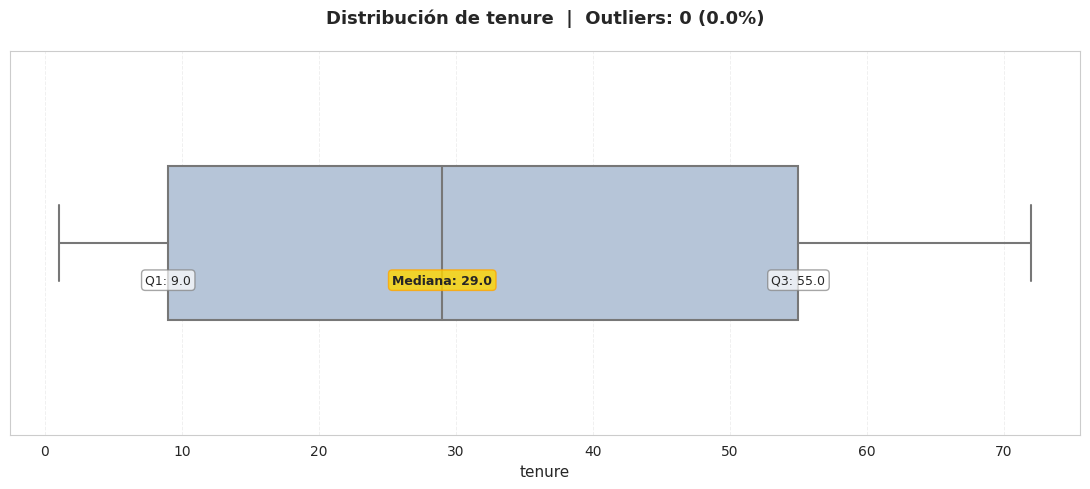

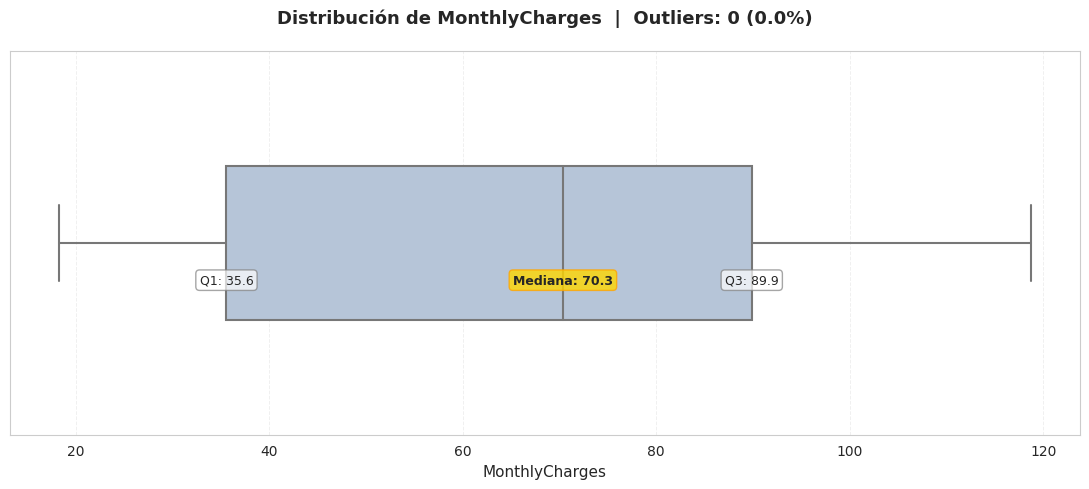

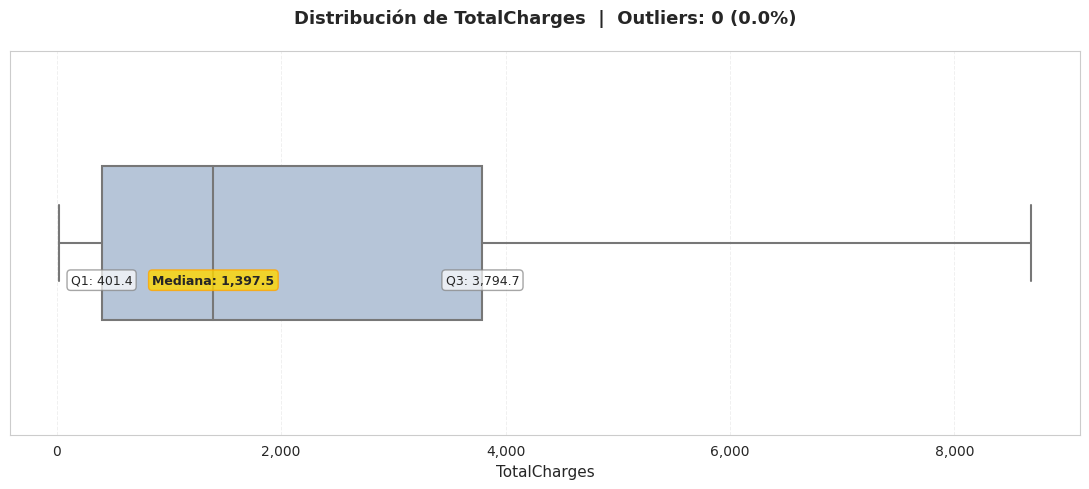

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Variables numéricas continuas (sin SeniorCitizen)
variables_numericas_continuas = [v for v in variables_numericas if v != 'SeniorCitizen']

for i in variables_numericas_continuas:
    fig, ax = plt.subplots(figsize=(11, 5))
    
    # Calcular estadísticas
    data_clean = df[i].dropna()
    Q1 = data_clean.quantile(0.25)
    Q3 = data_clean.quantile(0.75)
    median = data_clean.median()
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_clean[(data_clean < lower_bound) | (data_clean > upper_bound)]
    
    # Boxplot base
    bp = sns.boxplot(data=df, x=i, color='lightsteelblue', width=0.4, ax=ax,
                     flierprops=dict(marker='o', markerfacecolor='coral', markersize=6, 
                                     alpha=0.6, markeredgecolor='darkred', markeredgewidth=0.8))
    
    # Anotar valores clave
    y_pos = 0.08
    ax.text(Q1, y_pos, f'Q1: {Q1:,.1f}', ha='center', va='top', fontsize=9, 
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.7))
    ax.text(median, y_pos, f'Mediana: {median:,.1f}', ha='center', va='top', fontsize=9, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='gold', edgecolor='orange', alpha=0.8))
    ax.text(Q3, y_pos, f'Q3: {Q3:,.1f}', ha='center', va='top', fontsize=9,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.7))
    
    # Título con info de outliers
    n_outliers = len(outliers)
    pct_outliers = (n_outliers / len(data_clean)) * 100
    ax.set_title(f'Distribución de {i}  |  Outliers: {n_outliers} ({pct_outliers:.1f}%)', 
                 fontsize=13, fontweight='bold', pad=20)
    ax.set_xlabel(i, fontsize=11)
    ax.set_ylabel('')
    
    # Grid y formato
    ax.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.7)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    plt.tight_layout()
    plt.show()

In [11]:
def detectar_outliers(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[variable] < (Q1 - 1.5 * IQR)) | (df[variable] > (Q3 + 1.5 * IQR))]

#%%
for i in variables_numericas:
    num_outliers = len(detectar_outliers(df, i))
    print(f"La variable {i} tiene {num_outliers if num_outliers == 1 else f'{num_outliers} valores'} atipicos.")

La variable tenure tiene 0 valores atipicos.
La variable MonthlyCharges tiene 0 valores atipicos.
La variable TotalCharges tiene 0 valores atipicos.


In [12]:
import pandas as pd
import numpy as np
import missingno as msno

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# In order to correctly display plotly images in kaggle
import plotly.io as pio
pio.renderers.default = "png"
# Utilities
import warnings
from IPython.display import display, Markdown

warnings.filterwarnings("ignore")

# Global display settings
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(8,5))
plt.rcParams["figure.figsize"] = (10, 5)

<Figure size 800x500 with 0 Axes>

### 🧩 Análisis de Outliers en `SeniorCitizen`

La variable `SeniorCitizen` representa si el cliente es considerado un ciudadano senior o no, donde:

| Valor | Significado |
|:------:|-------------|
| 0 | Cliente **no senior** (menor de 65 años) |
| 1 | Cliente **senior** (65 años o más) |

Dado que se trata de una **variable categórica binaria**, sus valores posibles solo pueden ser `0` o `1`.  
Por esta razón, no deberían existir *outliers* reales, ya que no hay un rango continuo de valores.

#### 🔎 Verificación de valores únicos
Se realizó un conteo de valores para confirmar que no existan registros fuera del rango esperado:

```python
df['SeniorCitizen'].value_counts()

## Realiza un análisis estadístico básico para entender las distribuciones de las variables.

In [13]:
df.describe(include="all")

gender  SeniorCitizen Partner Dependents       tenure PhoneService  \
count    7032    7032.000000    7032       7032  7032.000000         7032   
unique      2            NaN       2          2          NaN            2   
top      Male            NaN      No         No          NaN          Yes   
freq     3549            NaN    3639       4933          NaN         6352   
mean      NaN       0.162400     NaN        NaN    32.421786          NaN   
std       NaN       0.368844     NaN        NaN    24.545260          NaN   
min       NaN       0.000000     NaN        NaN     1.000000          NaN   
25%       NaN       0.000000     NaN        NaN     9.000000          NaN   
50%       NaN       0.000000     NaN        NaN    29.000000          NaN   
75%       NaN       0.000000     NaN        NaN    55.000000          NaN   
max       NaN       1.000000     NaN        NaN    72.000000          NaN   

       MultipleLines InternetService OnlineSecurity OnlineBackup  \
count           7032            7032           7032         7032   
unique             3               3              3            3   
top               No     Fiber optic             No           No   
freq            3385            3096           3497         3087   
mean             NaN             NaN            NaN          NaN   
std              NaN             NaN            NaN          NaN   
min              NaN             NaN            NaN          NaN   
25%              NaN             NaN            NaN          NaN   
50%              NaN             NaN            NaN          NaN   
75%              NaN             NaN            NaN          NaN   
max              NaN             NaN            NaN          NaN   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7032        7032        7032            7032   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3094        3472        2809            2781   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod  MonthlyCharges  \
count             7032             7032              7032     7032.000000   
unique               3                2                 4             NaN   
top     Month-to-month              Yes  Electronic check             NaN   
freq              3875             4168              2365             NaN   
mean               NaN              NaN               NaN       64.798208   
std                NaN              NaN               NaN       30.085974   
min                NaN              NaN               NaN       18.250000   
25%                NaN              NaN               NaN       35.587500   
50%                NaN              NaN               NaN       70.350000   
75%                NaN              NaN               NaN       89.862500   
max                NaN              NaN               NaN      118.750000   

        TotalCharges Churn  
count    7032.000000  7032  
unique           NaN     2  
top              NaN    No  
freq             NaN  5163  
mean     2283.300441   NaN  
std      2266.771362   NaN  
min        18.800000   NaN  
25%       401.450000   NaN  
50%      1397.475000   NaN  
75%      3794.737500   NaN  
max      8684.800000   NaN

# 📊 Análisis Exploratorio de Datos (EDA)

El **Análisis Exploratorio de Datos (EDA)** permite comprender mejor la estructura del dataset, detectar patrones, comportamientos, posibles relaciones entre variables y validar la calidad de los datos antes de aplicar cualquier modelo predictivo.

A continuación, se presentan los pasos principales desarrollados en esta etapa:

---

##  Visualización de la distribución de variables numéricas

Se analizan las variables numéricas (`tenure`, `MonthlyCharges`, `TotalCharges`) para observar su distribución, detectar sesgos y posibles *outliers*.


In [14]:

import altair as alt
alt.data_transformers.disable_max_rows()
df['Churn'] = df['Churn'].astype(str)

colors = alt.Scale(domain=['Yes','No'], range=['#E63946', '#457B9D'])

def hist_facet(col):
    return (
        alt.Chart(df)
        .mark_bar(opacity=0.85)
        .encode(
            x=alt.X(col, bin=alt.Bin(maxbins=10), title=col),
            y=alt.Y('count()', title='Frecuencia'),
            color=alt.Color('Churn', scale=colors, legend=None)
        )
        .properties(width=230, height=220, title=f'{col}')
        .facet(column=alt.Column('Churn:N', header=alt.Header(title='Churn')))
    )

final = alt.hconcat(
    hist_facet('tenure'),
    hist_facet('MonthlyCharges'),
    hist_facet('TotalCharges')
).resolve_scale(y='independent').configure_view(strokeOpacity=0)

final

alt.HConcatChart(...)

## 🧭 Conclusiones del Análisis Visual (EDA)

### 🔹 Variables numéricas (`tenure`, `MonthlyCharges`, `TotalCharges`)

- **Tenure:**  
  Los clientes con **pocos meses de servicio** presentan una **mayor tasa de churn** (color rojo).  
  Esto indica que los usuarios nuevos tienden a abandonar el servicio con más facilidad, reflejando un posible problema en la etapa inicial del ciclo de vida del cliente.

- **MonthlyCharges:**  
  Los clientes con **cargos mensuales más altos** también muestran **más churn**, lo cual sugiere que el precio puede ser un factor importante en la decisión de cancelación.

- **TotalCharges:**  
  Existe una relación directa entre `tenure` y `TotalCharges` para los clientes que deciden abandonar el servicio; los clientes con menor gasto acumulado (recién llegados) son los que más cancelan.  
  Los clientes con facturación más alta suelen permanecer más tiempo, mostrando fidelidad al servicio.

---


In [15]:
import pandas as pd
import altair as alt

alt.data_transformers.disable_max_rows()
df['Churn'] = df['Churn'].astype(str)

# --------- VARIABLES CATEGÓRICAS A ANALIZAR ---------
cat_cols = [
    'Contract', 'InternetService', 'PaymentMethod',
    'Partner', 'Dependents', 'PhoneService', 'gender'
]

# --------- AGREGACIÓN ROBUSTA: % YES / % NO POR CATEGORÍA ---------
parts = []
for var in cat_cols:
    t = (df
         .groupby([var, 'Churn'])
         .size()
         .reset_index(name='count')
         .rename(columns={var: 'Categoria'}))
    t['Variable'] = var
    t['pct'] = t['count'] / t.groupby(['Variable','Categoria'])['count'].transform('sum')
    parts.append(t)

agg = pd.concat(parts, ignore_index=True)

# Tabla de % por clase en columnas (útil para tornado)
wide = (agg
        .pivot_table(index=['Variable','Categoria'], columns='Churn', values='pct', fill_value=0)
        .reset_index())
# Garantiza columnas presentes
if 'Yes' not in wide: wide['Yes'] = 0
if 'No' not in wide:  wide['No']  = 0

# --------- SELECCIÓN INTERACTIVA ---------
dropdown = alt.binding_select(options=cat_cols, name='Variable: ')
sel = alt.selection_point(fields=['Variable'], bind=dropdown, value=cat_cols[0])

# --------- PALETA ---------
yes_color = '#E63946'
no_color  = '#457B9D'

# ============ 1) GRÁFICO TORNADO (BUTTERFLY) ============
# barras espejo: No a la izquierda (negativo), Yes a la derecha (positivo)
tornado_left = (
    alt.Chart(wide)
      .transform_calculate(pctNo='-datum.No')  # invierte
      .mark_bar(color=no_color, opacity=0.9)
      .encode(
          y=alt.Y('Categoria:N', sort='-x', title=None),
          x=alt.X('pctNo:Q', title='% No', axis=alt.Axis(format='%')),
          tooltip=[
              alt.Tooltip('Categoria:N', title='Categoría'),
              alt.Tooltip('No:Q', title='% No', format='.1%'),
              alt.Tooltip('Yes:Q', title='% Yes', format='.1%')
          ]
      )
      .add_params(sel)
      .transform_filter(sel)
      .properties(width=240, height=260)
)

tornado_right = (
    alt.Chart(wide)
      .mark_bar(color=yes_color, opacity=0.9)
      .encode(
          y=alt.Y('Categoria:N', sort='-x', title=None),
          x=alt.X('Yes:Q', title='% Yes', axis=alt.Axis(format='%')),
          tooltip=[
              alt.Tooltip('Categoria:N', title='Categoría'),
              alt.Tooltip('No:Q', title='% No', format='.1%'),
              alt.Tooltip('Yes:Q', title='% Yes', format='.1%')
          ]
      )
      .add_params(sel)
      .transform_filter(sel)
      .properties(width=240, height=260)
)

tornado = alt.hconcat(tornado_left, tornado_right).resolve_scale(y='shared').properties(
    title='Tornado: proporción de Yes/No por categoría'
)

# ============ 2) LOLLIPOP RANKING (SÓLO % CHURN = YES) ============
lollipop = (
    alt.Chart(wide)
      .mark_rule(color='#D3D3D3')
      .encode(x=alt.X('Yes:Q', title='% Yes (Churn)', axis=alt.Axis(format='%')))
      .properties(width=520, height=10)
).properties(width=520, height=10)

sticks = (
    alt.Chart(wide)
      .mark_rule(color='#999', strokeWidth=2)
      .encode(
          y=alt.Y('Categoria:N', sort='-x', title=None),
          x=alt.X('Yes:Q', title=None, axis=alt.Axis(format='%'))
      )
      .transform_filter(sel)
)

dots = (
    alt.Chart(wide)
      .mark_circle(size=120, color=yes_color)
      .encode(
          y=alt.Y('Categoria:N', sort='-x', title=None),
          x=alt.X('Yes:Q', title='% Yes (Churn)', axis=alt.Axis(format='%')),
          tooltip=[
              alt.Tooltip('Categoria:N', title='Categoría'),
              alt.Tooltip('Yes:Q', title='% Yes', format='.1%')
          ]
      )
      .transform_filter(sel)
)

lollipop_rank = (sticks + dots).properties(width=520, height=260, title='Ranking de churn (Yes) por categoría')

# ============ PANTALLA FINAL ============
final = alt.hconcat(tornado, lollipop_rank).configure_view(strokeOpacity=0)
final

alt.HConcatChart(...)


### 🔹 Variables categóricas (`Contract`, `InternetService`, `PaymentMethod`, etc.)

- **Contract:**  
  Los clientes con **contrato mensual** tienen una **tasa de churn significativamente mayor**, mientras que los contratos de uno o dos años están asociados con mayor retención.  
  Esto confirma que los planes a largo plazo ayudan a reducir la cancelación.

- **InternetService:**  
  Los usuarios con **servicio de fibra óptica** presentan un **churn más alto**, posiblemente debido a precios más elevados o problemas de satisfacción con el servicio.

- **PaymentMethod:**  
  Los clientes que pagan mediante **Electronic Check** muestran una **mayor propensión a cancelar**, frente a quienes utilizan tarjeta o débito automático.  
  Esto puede reflejar diferencias en comodidad de pago o fidelidad del cliente.

- **Partner / Dependents:**  
  Los clientes **sin pareja ni dependientes** tienden a cancelar más, lo que puede relacionarse con menor estabilidad o menor necesidad del servicio a largo plazo.

---

### 🎯 Conclusión general del EDA

El análisis visual muestra que el *churn* está influido principalmente por:
- **Antigüedad baja (`tenure` bajo)**
- **Contratos mensuales**
- **Pagos electrónicos**
- **Altos costos mensuales**

Estos hallazgos orientan las estrategias de retención hacia ofrecer **beneficios por permanencia**, **planes de fidelización** y **opciones de pago más estables**, además de reforzar la experiencia de los clientes durante sus **primeros meses** con la empresa.

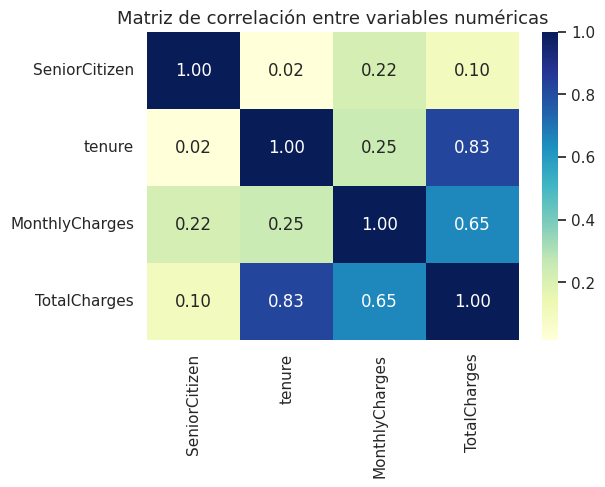

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo variables numéricas
num_df = df.select_dtypes(include=['float64','int64'])

# Matriz de correlación
plt.figure(figsize=(6,4))
sns.heatmap(num_df.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas", fontsize=13)
plt.show()

### 🧩 Conclusión — Correlación entre variables numéricas

La matriz de correlación evidencia las siguientes relaciones principales:

- Existe una **alta correlación positiva** entre `tenure` y `TotalCharges` (**0.83**), lo cual es lógico:  
  a mayor tiempo como cliente, mayor monto total facturado.
- Se observa una **correlación moderada** entre `MonthlyCharges` y `TotalCharges` (**0.65**),  
  ya que las tarifas mensuales influyen directamente en el total cobrado.
- La variable `SeniorCitizen` muestra **baja correlación** con las demás (<0.25),  
  lo que indica que ser adulto mayor no tiene una relación lineal directa con los cargos o el tiempo de permanencia.
- En general, **no se detectan relaciones redundantes** entre las variables numéricas,  
  por lo que todas podrían conservarse para el modelado sin riesgo de multicolinealidad significativa.

> 📊 **Conclusión:**  
> Las variables `tenure`, `MonthlyCharges` y `TotalCharges` están fuertemente relacionadas entre sí  
> y describen el comportamiento financiero y la permanencia del cliente.  
> Esto sugiere que son **factores clave para el modelo predictivo de churn (abandono de clientes)**.

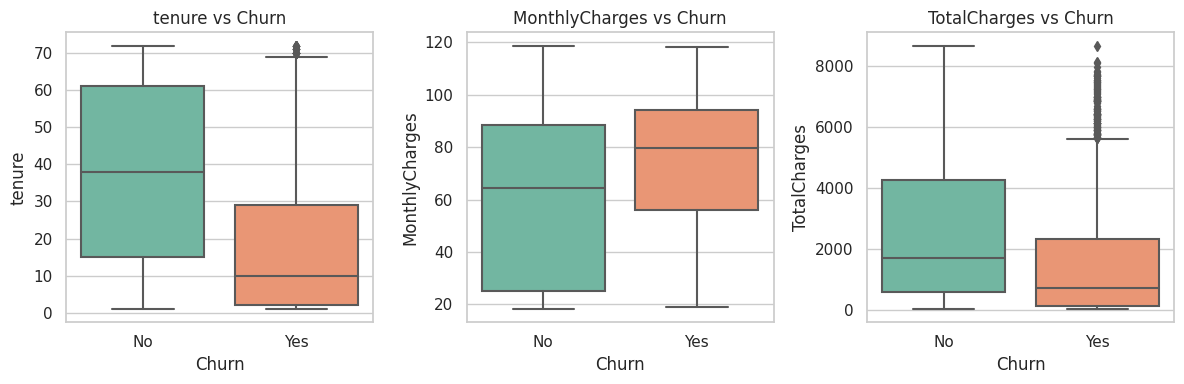

In [18]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(12,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

### 📊 Conclusión — Relación entre variables numéricas y `Churn`

Los boxplots permiten visualizar cómo se distribuyen las variables numéricas en función de si el cliente ha abandonado (`Churn = Yes`) o no (`Churn = No`):

- **`tenure` (tiempo como cliente):**  
  Los clientes con menor tiempo de permanencia muestran una mayor proporción de abandono.  
  En cambio, quienes llevan más tiempo tienden a mantenerse activos.

- **`MonthlyCharges` (cargos mensuales):**  
  Los clientes que pagan cargos mensuales más altos presentan una ligera tendencia a darse de baja,  
  posiblemente por sensibilidad al costo o falta de planes con mejor relación costo-beneficio.

- **`TotalCharges` (cargos totales):**  
  Los clientes con menores cargos totales son quienes más abandonan,  
  lo que refuerza la idea de que los clientes nuevos o de bajo gasto tienden a irse antes.

> 💡 **Conclusión general:**  
> El abandono (`Churn`) se asocia principalmente con **clientes nuevos o de bajo gasto**,  
> mientras que los clientes con mayor antigüedad o cargos acumulados tienden a ser más fieles.  
> Esto sugiere que **la retención temprana** y **la gestión de precios** son factores clave para reducir el churn.

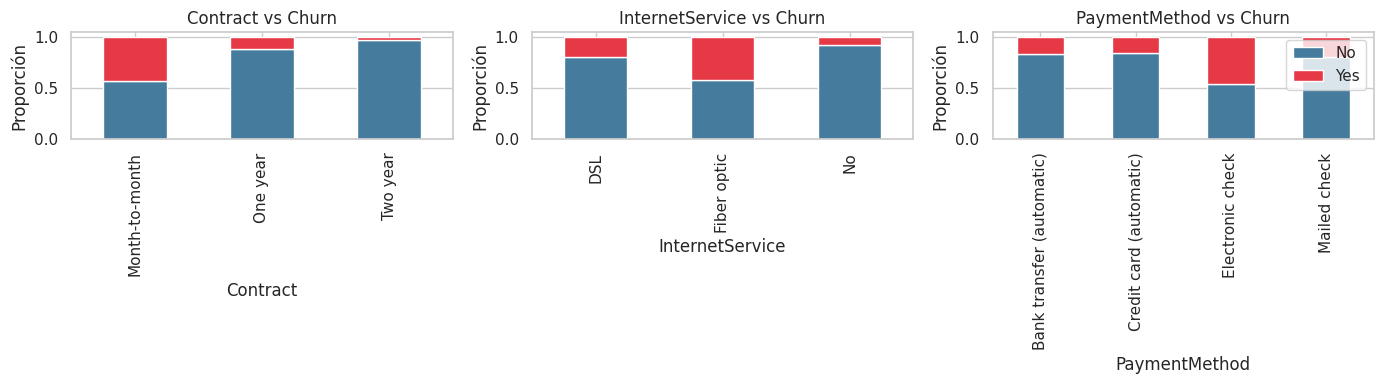

In [19]:
cat_cols = ['Contract','InternetService','PaymentMethod']

plt.figure(figsize=(14,4))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    prop = df.groupby([col,'Churn']).size().unstack().apply(lambda x: x/x.sum(), axis=1)
    prop.plot(kind='bar', stacked=True, color=['#457b9d','#e63946'], ax=plt.gca(), legend=False)
    plt.title(f'{col} vs Churn')
    plt.ylabel('Proporción')
plt.legend(['No', 'Yes'], loc='upper right')
plt.tight_layout()
plt.show()

### 📊 Conclusión — Relación entre variables categóricas y `Churn`

Las proporciones por categoría permiten identificar los segmentos de clientes con mayor tendencia al abandono:

- **`Contract` (tipo de contrato):**  
  Los clientes con contrato **"Month-to-month"** presentan la **mayor tasa de churn**,  
  mientras que aquellos con contratos de **uno o dos años** muestran una retención significativamente mayor.  
  Esto sugiere que los compromisos de largo plazo ayudan a reducir la rotación de clientes.

- **`InternetService` (tipo de servicio de internet):**  
  Los usuarios con **"Fiber optic"** registran la **mayor proporción de churn**,  
  posiblemente debido a costos más altos o problemas de servicio.  
  En cambio, los clientes con **DSL o sin servicio de internet** tienen tasas de abandono mucho menores.

- **`PaymentMethod` (método de pago):**  
  Los clientes que pagan mediante **“Electronic check”** son los que más abandonan,  
  mientras que quienes usan **transferencias bancarias automáticas o tarjetas de crédito** presentan menor churn.  
  Esto puede indicar que los métodos de pago automáticos favorecen la permanencia.

> 💡 **Conclusión general:**  
> Las variables **Contract**, **InternetService** y **PaymentMethod** influyen directamente en la probabilidad de abandono.  
> Los contratos cortos, servicios de fibra y pagos manuales están asociados a **mayor riesgo de churn**,  
> mientras que los contratos largos y pagos automáticos fortalecen la **retención del cliente**.

### 🧩 Bloque 1: Pipeline de Transformación Mejorado

En este bloque se construyó un **pipeline de preprocesamiento** para preparar los datos antes del modelado del churn.

1. **Variables definidas:**  
   Se separaron las variables numéricas y categóricas, excluyendo `Churn`, `customerID` y `TotalCharges`.

2. **Procesamiento categórico:**  
   Se aplicó un **One-Hot Encoding** con `drop='first'` para evitar colinealidad y `handle_unknown='ignore'` para manejar categorías nuevas.

3. **Procesamiento numérico:**  
   Se creó un pipeline con **imputación de valores faltantes** (mediana) y **escalado estandarizado** (`StandardScaler`).

4. **Integración:**  
   Ambos pipelines se unieron con `ColumnTransformer`, generando un preprocesador unificado (`preprocessor`).

5. **Salida final:**  
   Se generó el DataFrame transformado `X_transformed_df` con todas las features numéricas y codificadas, junto con la variable objetivo binaria `y = Churn_binary`.

Este pipeline garantiza que los datos estén limpios, escalados y listos para alimentar cualquier modelo de machine learning.


In [45]:
# ========== BLOQUE 1: PIPELINE DE TRANSFORMACIÓN (MEJORADO) ==========

import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

print("📦 Creando Pipeline de transformación mejorado...")

# Definir variables
cat_vars = [v for v in variables_categoricas if v not in ['Churn', 'customerID', 'TotalCharges']]
num_vars = variables_numericas.copy()

print(f"\n✅ Variables categóricas: {len(cat_vars)}")
print(f"✅ Variables numéricas: {len(num_vars)}")

# Pipeline para categóricas (One-Hot Encoding)
cat_pipeline = Pipeline([
    ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

# Pipeline para numéricas (Imputer + Scaler)
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# ColumnTransformer combinado
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_vars),
        ('cat', cat_pipeline, cat_vars)
    ],
    remainder='drop'
)

# Preparar datos
df['Churn_binary'] = (df['Churn'] == 'Yes').astype(int)
X = df[cat_vars + num_vars].copy()
y = df['Churn_binary']

print(f"\n✅ Shape original: {X.shape}")

# Aplicar transformación
X_transformed = preprocessor.fit_transform(X)

# Obtener nombres de features
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['ohe'].get_feature_names_out(cat_vars)
feature_names = list(num_vars) + list(cat_feature_names)

# DataFrame transformado
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names, index=X.index)

print(f"✅ Shape después de transformación: {X_transformed_df.shape}")
print(f"✅ Total de features: {len(feature_names)}")

print("\n💾 Variables creadas:")
print("   - preprocessor: Pipeline de transformación")
print("   - X_transformed_df: Datos transformados")
print("   - y: Variable objetivo (Churn_binary)")
print("   - feature_names: Lista de nombres de features")

📦 Creando Pipeline de transformación mejorado...

✅ Variables categóricas: 16
✅ Variables numéricas: 3

✅ Shape original: (7032, 19)
✅ Shape después de transformación: (7032, 30)
✅ Total de features: 30

💾 Variables creadas:
   - preprocessor: Pipeline de transformación
   - X_transformed_df: Datos transformados
   - y: Variable objetivo (Churn_binary)
   - feature_names: Lista de nombres de features


### 🌲 Selección de características con Random Forest (resumen)

Este bloque usa un **RandomForestClassifier** para medir y filtrar las variables más relevantes del churn a partir de `X_transformed_df` (ya codificado/estandarizado).

1. **Split estratificado:** divide datos en *train/test* (80/20) preservando proporción de `y`.
2. **Entrenamiento RF:** bosque con `class_weight='balanced'` y límites de complejidad (`max_depth=10`, `min_samples_*`) para evitar sobreajuste.
3. **Importancias:** calcula `feature_importances_`, las ordena y muestra el **Top 20**; grafica:
   - **Barplot** del **Top 25**.
   - **Curva de importancia acumulada** con líneas guía al **90%** y **95%**.
4. **Corte por importancia:** reporta cuántas features explican el **90%** y **95%** de la importancia total.
5. **Selección de features:** dos estrategias:
   - **Umbral** `importance >= 0.01`.
   - **Top-K** (`K=20`) por importancia.
6. **Nuevos datasets:** crea `X_train_selected` y `X_test_selected` con las features elegidas.
7. **Comparación de modelos:** evalúa **accuracy** del RF con **todas** las variables vs. con **Top-K**, e imprime la diferencia.
8. **Artefactos guardados:** `X_train/X_test`, `X_train_selected/X_test_selected`, `y_train/y_test`, `selected_features_topk`, `rf_model`, `feature_importance`.

Resultado: un pipeline claro para **priorizar variables**, **reducir dimensionalidad** y **verificar** si el rendimiento se mantiene o mejora usando solo las más importantes.


🌲 Iniciando selección de características con Random Forest...

✅ Train: (5625, 30)
✅ Test: (1407, 30)

🌲 Entrenando Random Forest para Feature Selection...

📊 Top 20 Features más importantes:

                             feature  importance
                              tenure    0.191731
                        TotalCharges    0.139847
                      MonthlyCharges    0.097933
                   Contract_Two year    0.091115
         InternetService_Fiber optic    0.083535
      PaymentMethod_Electronic check    0.061476
                   Contract_One year    0.033751
                  OnlineSecurity_Yes    0.032111
                     TechSupport_Yes    0.027079
  OnlineSecurity_No internet service    0.018096
    OnlineBackup_No internet service    0.016674
                PaperlessBilling_Yes    0.015701
                  InternetService_No    0.015618
DeviceProtection_No internet service    0.015152
     StreamingTV_No internet service    0.014781
                    Onl

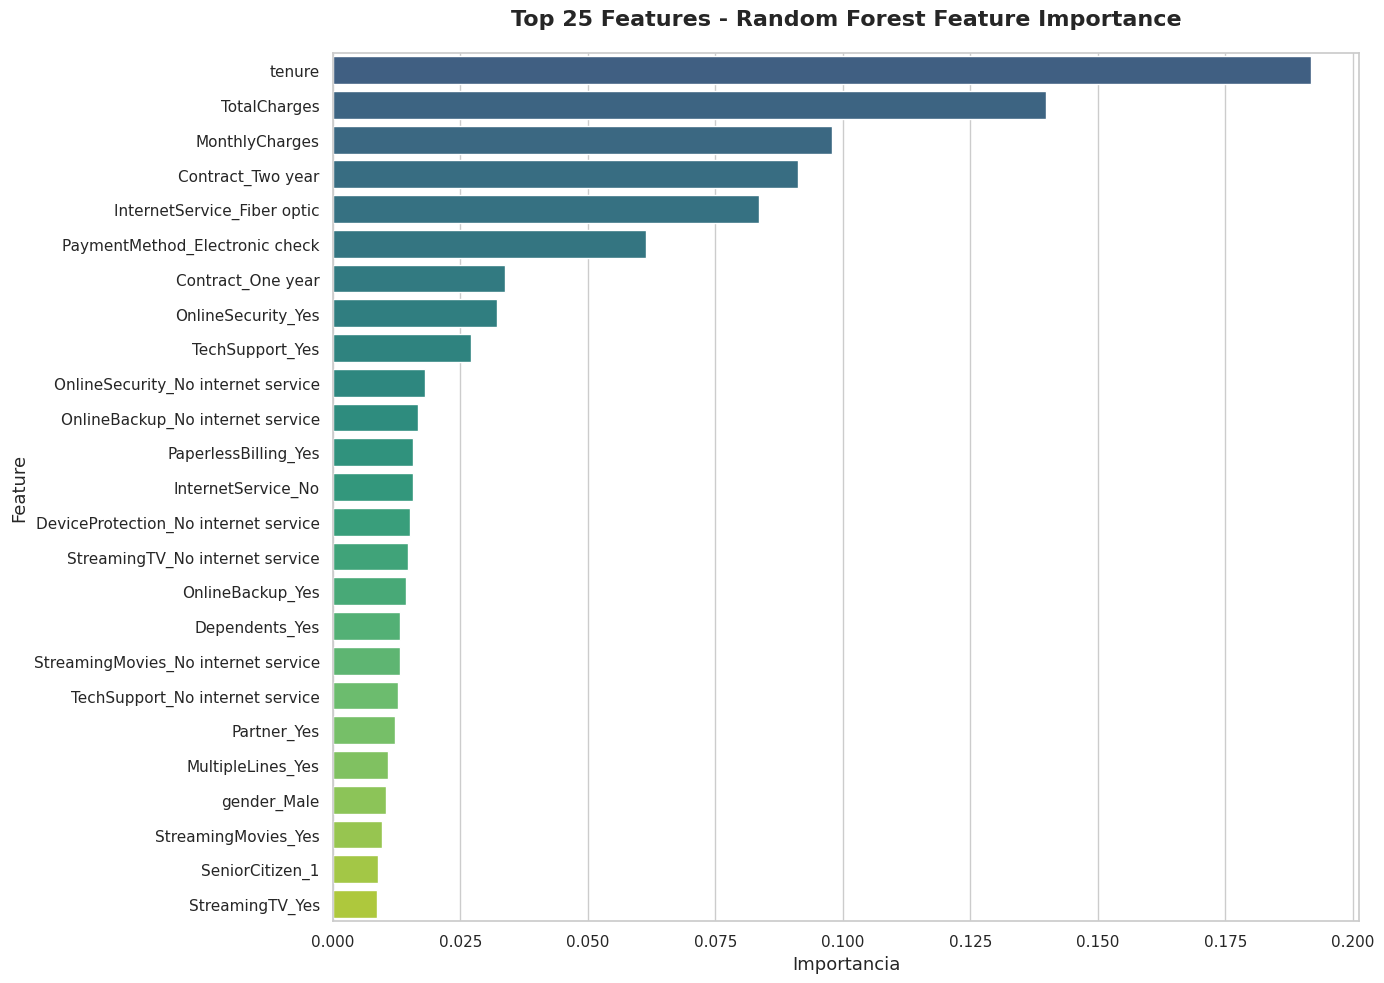

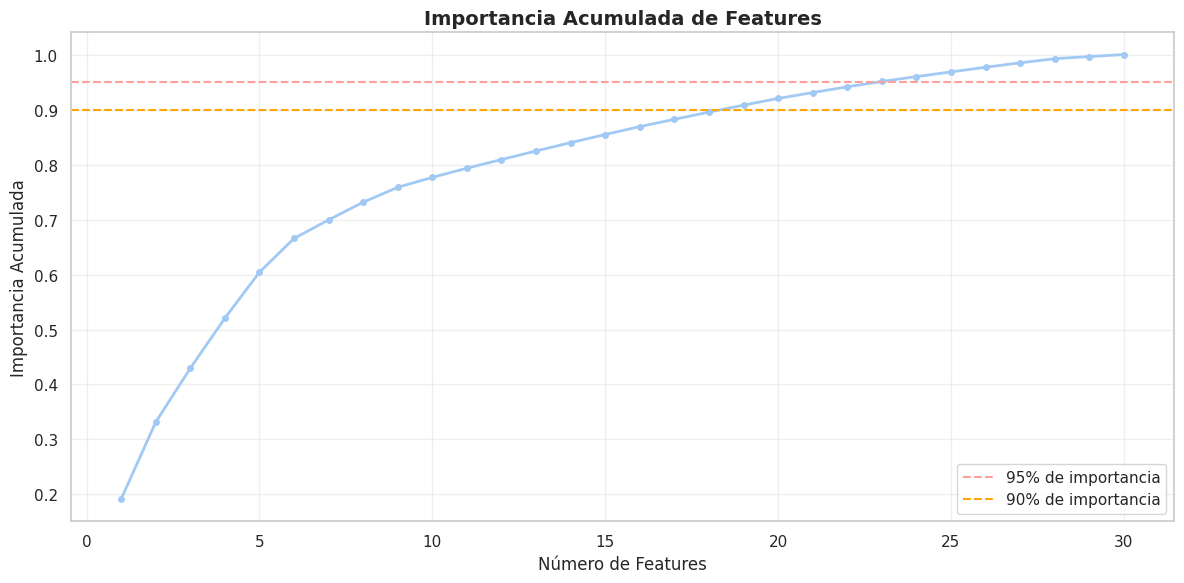


📈 Importancia acumulada:
   Para 90% de importancia: 18 features
   Para 95% de importancia: 22 features

✅ Features con importancia >= 0.01: 22

✅ Top 20 features seleccionadas:
    1. tenure                                   → 0.1917
    2. TotalCharges                             → 0.1398
    3. MonthlyCharges                           → 0.0979
    4. Contract_Two year                        → 0.0911
    5. InternetService_Fiber optic              → 0.0835
    6. PaymentMethod_Electronic check           → 0.0615
    7. Contract_One year                        → 0.0338
    8. OnlineSecurity_Yes                       → 0.0321
    9. TechSupport_Yes                          → 0.0271
   10. OnlineSecurity_No internet service       → 0.0181
   11. OnlineBackup_No internet service         → 0.0167
   12. PaperlessBilling_Yes                     → 0.0157
   13. InternetService_No                       → 0.0156
   14. DeviceProtection_No internet service     → 0.0152
   15. StreamingTV_No 

In [28]:
# ========== SELECCIÓN DE CARACTERÍSTICAS CON RANDOM FOREST ==========

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print("🌲 Iniciando selección de características con Random Forest...\n")

# --------- 1. SPLIT TRAIN/TEST ---------
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed_df, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Train: {X_train.shape}")
print(f"✅ Test: {X_test.shape}")

# --------- 2. ENTRENAR RANDOM FOREST ---------
print("\n🌲 Entrenando Random Forest para Feature Selection...")

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'  # Para balancear las clases
)

rf_model.fit(X_train, y_train)

# --------- 3. OBTENER IMPORTANCIAS ---------
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📊 Top 20 Features más importantes:\n")
print(feature_importance.head(20).to_string(index=False))

# --------- 4. VISUALIZAR IMPORTANCIAS ---------
plt.figure(figsize=(14, 10))
top_n = 25

colors = plt.cm.viridis(np.linspace(0.3, 0.9, top_n))
ax = sns.barplot(
    data=feature_importance.head(top_n),
    x='importance',
    y='feature',
    palette=colors
)
plt.title(f'Top {top_n} Features - Random Forest Feature Importance', 
          fontsize=16, weight='bold', pad=20)
plt.xlabel('Importancia', fontsize=13)
plt.ylabel('Feature', fontsize=13)
plt.tight_layout()
plt.show()

# --------- 5. IMPORTANCIA ACUMULADA ---------
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(feature_importance) + 1), 
         feature_importance['cumulative_importance'], 
         marker='o', linewidth=2, markersize=4)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% de importancia')
plt.axhline(y=0.90, color='orange', linestyle='--', label='90% de importancia')
plt.xlabel('Número de Features', fontsize=12)
plt.ylabel('Importancia Acumulada', fontsize=12)
plt.title('Importancia Acumulada de Features', fontsize=14, weight='bold')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Calcular cuántas features para 95% y 90%
n_features_95 = (feature_importance['cumulative_importance'] <= 0.95).sum()
n_features_90 = (feature_importance['cumulative_importance'] <= 0.90).sum()

print(f"\n📈 Importancia acumulada:")
print(f"   Para 90% de importancia: {n_features_90} features")
print(f"   Para 95% de importancia: {n_features_95} features")

# --------- 6. SELECCIONAR TOP FEATURES ---------
# Opción 1: Por umbral de importancia
threshold = 0.01  # Ajusta según necesites
selected_features_threshold = feature_importance[
    feature_importance['importance'] >= threshold
]['feature'].tolist()

print(f"\n✅ Features con importancia >= {threshold}: {len(selected_features_threshold)}")

# Opción 2: Top K features
top_k = 20  # Ajusta según necesites
selected_features_topk = feature_importance.head(top_k)['feature'].tolist()

print(f"\n✅ Top {top_k} features seleccionadas:")
for i, feat in enumerate(selected_features_topk, 1):
    imp = feature_importance[feature_importance['feature'] == feat]['importance'].values[0]
    print(f"   {i:2d}. {feat:40s} → {imp:.4f}")

# --------- 7. CREAR DATASETS CON FEATURES SELECCIONADAS ---------
X_train_selected = X_train[selected_features_topk]
X_test_selected = X_test[selected_features_topk]

print(f"\n✅ Nuevo shape con features seleccionadas:")
print(f"   Train: {X_train_selected.shape}")
print(f"   Test: {X_test_selected.shape}")

# --------- 8. EVALUAR MODELO CON TODAS LAS FEATURES VS SELECCIONADAS ---------
print("\n🔍 Evaluando modelos...")

# Predicciones con todas las features
y_pred_all = rf_model.predict(X_test)
acc_all = accuracy_score(y_test, y_pred_all)

# Entrenar con features seleccionadas
rf_selected = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10, 
    random_state=42, 
    n_jobs=-1, 
    class_weight='balanced'
)
rf_selected.fit(X_train_selected, y_train)
y_pred_selected = rf_selected.predict(X_test_selected)
acc_selected = accuracy_score(y_test, y_pred_selected)

print(f"\n🎯 Comparación de Accuracy:")
print(f"   Con TODAS las features ({X_train.shape[1]}): {acc_all:.4f}")
print(f"   Con TOP {top_k} features: {acc_selected:.4f}")
print(f"   Diferencia: {acc_selected - acc_all:+.4f}")

# --------- 9. GUARDAR PARA USO POSTERIOR ---------
print("\n💾 Variables guardadas para los siguientes pasos:")
print("   - X_train, X_test: datos completos con encoding")
print("   - X_train_selected, X_test_selected: datos con top features")
print("   - y_train, y_test: labels binarios")
print("   - selected_features_topk: lista de features seleccionadas")
print("   - rf_model: modelo Random Forest entrenado")
print("   - feature_importance: DataFrame con todas las importancias")

### Balanceo de datos



In [46]:
# ========== BLOQUE 2: BALANCEO DE DATOS CON SMOTE ==========

from imblearn.over_sampling import SMOTE
from collections import Counter

print("\n⚖️ BALANCEANDO DATOS CON SMOTE...")
print("━" * 60)

# Verificar distribución ANTES del balanceo
print(f"\n📊 Distribución ORIGINAL de y_train:")
print(f"   No Churn (0): {(y_train == 0).sum()} ({(y_train == 0).sum()/len(y_train)*100:.1f}%)")
print(f"   Churn (1):    {(y_train == 1).sum()} ({(y_train == 1).sum()/len(y_train)*100:.1f}%)")

# Aplicar SMOTE SOLO en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_selected_bal, y_train_bal = smote.fit_resample(X_train_selected, y_train)

print(f"\n📊 Distribución DESPUÉS de SMOTE:")
print(f"   No Churn (0): {(y_train_bal == 0).sum()} ({(y_train_bal == 0).sum()/len(y_train_bal)*100:.1f}%)")
print(f"   Churn (1):    {(y_train_bal == 1).sum()} ({(y_train_bal == 1).sum()/len(y_train_bal)*100:.1f}%)")

print(f"\n✅ Shape ANTES de SMOTE:  {X_train_selected.shape}")
print(f"✅ Shape DESPUÉS de SMOTE: {X_train_selected_bal.shape}")

# SOBRESCRIBIR variables para usar en el resto del código
# ⚠️ IMPORTANTE: Solo balanceamos TRAIN, NO TEST
#X_train_selected = X_train_selected_bal
#y_train = y_train_bal

#print(f"\n💾 Variables actualizadas:")
#print(f"   - X_train_selected: Ahora contiene datos BALANCEADOS")
#print(f"   - y_train: Ahora contiene labels BALANCEADOS")
#print(f"   - X_test_selected: SIN CAMBIOS (datos reales)")
#print(f"   - y_test: SIN CAMBIOS (datos reales)")

print("\n⚠️ NOTA: El test set NO se balancea (debe mantener distribución real)")
print("━" * 60)


⚖️ BALANCEANDO DATOS CON SMOTE...
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📊 Distribución ORIGINAL de y_train:
   No Churn (0): 4130 (73.4%)
   Churn (1):    1495 (26.6%)

📊 Distribución DESPUÉS de SMOTE:
   No Churn (0): 4130 (50.0%)
   Churn (1):    4130 (50.0%)

✅ Shape ANTES de SMOTE:  (5625, 20)
✅ Shape DESPUÉS de SMOTE: (8260, 20)

⚠️ NOTA: El test set NO se balancea (debe mantener distribución real)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


In [30]:
# ========== BLOQUE 3: PREPARACIÓN DATOS FINALES ==========

print("📊 Preparando datasets finales...\n")

# Con TOP features
X_train_selected = X_train[selected_features_topk].copy()
X_test_selected = X_test[selected_features_topk].copy()

# Con TODAS las features
X_train_all = X_train.copy()
X_test_all = X_test.copy()

print("✅ Datasets listos:")
print(f"\n   TOP {top_k} FEATURES:")
print(f"   - X_train_selected: {X_train_selected.shape}")
print(f"   - X_test_selected: {X_test_selected.shape}")
print(f"\n   TODAS ({X_train.shape[1]} FEATURES):")
print(f"   - X_train_all: {X_train_all.shape}")
print(f"   - X_test_all: {X_test_all.shape}")

print(f"\n📈 Distribución de clases en TRAIN:")
print(f"   No Churn (0): {(y_train == 0).sum()} ({(y_train == 0).sum()/len(y_train)*100:.1f}%)")
print(f"   Churn (1):    {(y_train == 1).sum()} ({(y_train == 1).sum()/len(y_train)*100:.1f}%)")

📊 Preparando datasets finales...

✅ Datasets listos:

   TOP 20 FEATURES:
   - X_train_selected: (5625, 20)
   - X_test_selected: (1407, 20)

   TODAS (30 FEATURES):
   - X_train_all: (5625, 30)
   - X_test_all: (1407, 30)

📈 Distribución de clases en TRAIN:
   No Churn (0): 4130 (73.4%)
   Churn (1):    1495 (26.6%)


### 🚀 Bloque 4: Búsqueda de hiperparámetros con Hyperband (resumen)

- **Métrica F1 personalizada:** se define `F1Score` como media armónica de *precision* y *recall* para optimizar directamente el equilibrio entre falsos positivos y falsos negativos.
- **Espacio de modelos (DNN):** hasta **5 capas** densas; **unidades** {16–512}; **activaciones** {relu, tanh, elu}; **dropout** ∈ [0.0–0.5].
- **Optimizadores/LR:** {Adam, RMSprop} con *learning rate* en {1e-5, 1e-4, 1e-3, 1e-2, 1e-1}.
- **Compilación:** `loss='binary_crossentropy'` y métricas: *accuracy*, *precision*, *recall*, *AUC* y **F1**.
- **Tuning con Hyperband:** objetivo `val_f1_score` (maximizar), `max_epochs=50`, `factor=3`, `hyperband_iterations=2`.  
  EarlyStopping en `val_f1_score` con `patience=8` y `restore_best_weights=True`.
- **Datos:** búsqueda sobre `X_train_selected` (validación interna `validation_split=0.2`, `batch_size=32`).
- **Selección y evaluación:** se recupera el **mejor modelo** y sus hiperparámetros (`tuner.get_best_*`), y se evalúa en **TEST** reportando *loss, accuracy, precision, recall, AUC y F1*.
- **Salida útil:** `best_model`, `best_hp`, métricas de test y el **Top-5** configuraciones por F1.

Resultado: tuning sistemático y eficiente para maximizar **F1** en churn usando *Hyperband* sobre una MLP totalmente configurable.


In [ ]:
# ========== BLOQUE 4: HYPERBAND COMPLETO ==========

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
import time

# Métrica F1-Score personalizada
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)
    
    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))
    
    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

print("🔧 Configurando Hyperband COMPLETO (1000+ combinaciones)...\n")

# Función de construcción del modelo
def build_model(hp):
    model = keras.Sequential()
    input_dim = X_train_selected.shape[1]
    
    # Capas: 1, 2, 3, 4 o 5
    n_layers = hp.Int('n_layers', min_value=1, max_value=5)
    
    for i in range(n_layers):
        # Neuronas: 16, 32, 64, 128, 256 o 512
        units = hp.Choice(f'units_{i}', values=[16, 32, 64, 128, 256, 512])
        
        # Activación: relu, tanh, elu
        activation = hp.Choice(f'activation_{i}', values=['relu', 'tanh', 'elu'])
        
        # Dropout: 0.0, 0.1, 0.2, 0.3, 0.4, 0.5
        dropout = hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
        
        # Agregar capa Dense
        if i == 0:
            model.add(layers.Dense(units=units, activation=activation, input_shape=(input_dim,)))
        else:
            model.add(layers.Dense(units=units, activation=activation))
        
        # Agregar Dropout (solo si > 0)
        if dropout > 0:
            model.add(layers.Dropout(dropout))
    
    # Capa de salida
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Learning rate: más opciones
    lr = hp.Choice('learning_rate', values=[0.00001, 0.0001, 0.001, 0.01, 0.1])
    
    # Optimizador: Adam o RMSprop
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'rmsprop'])
    
    if optimizer_choice == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=lr)
    else:
        optimizer = keras.optimizers.RMSprop(learning_rate=lr)
    
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            Precision(name='precision'),
            Recall(name='recall'),
            AUC(name='auc'),
            F1Score(name='f1_score')
        ]
    )
    return model

# Hyperband
tuner = kt.Hyperband(
    build_model,
    objective=kt.Objective('val_f1_score', direction='max'),  # ← MAXIMIZAR F1-SCORE
    max_epochs=50,               # ← 50 épocas máximas (como acordamos)
    factor=3,                    # ← Factor 3 (más conservador)
    hyperband_iterations=2,      # ← 2 torneos para probar más modelos
    directory='hyperband_logs',
    project_name='churn_complete',
    overwrite=True
)

print("✅ Hyperband configurado!")
print("\n🔍 Espacio de búsqueda COMPLETO:")
print("   - Capas: [1, 2, 3, 4, 5]")
print("   - Neuronas: [16, 32, 64, 128, 256, 512]")
print("   - Activación: [relu, tanh, elu]")
print("   - Dropout: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]")
print("   - Learning rate: [0.00001, 0.0001, 0.001, 0.01, 0.1]")
print("   - Optimizador: [adam, rmsprop]")
print("\n📊 Configuración Hyperband:")
print("   - Max épocas: 50")
print("   - Factor: 3 (elimina 2/3 cada ronda)")
print("   - Torneos: 2")
print("\n📊 Combinaciones posibles: ~1000-2000")
print("⏱️ Tiempo estimado: 30-60 minutos")
print("\n🎯 Objetivo: MAXIMIZAR F1-SCORE (en validación)\n")
print("━" * 60)
print("🚀 Iniciando búsqueda exhaustiva...\n")

start_time = time.time()

tuner.search(
    X_train_selected, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_f1_score', patience=8, mode='max', restore_best_weights=True)],
    verbose=2
)

elapsed_time = time.time() - start_time

print("\n" + "━" * 60)
print(f"✅ Búsqueda completada en {elapsed_time/60:.1f} minutos!")
print(f"   ({elapsed_time:.0f} segundos)")
print("━" * 60)

print("\n🏆 Mejor modelo encontrado:")
best_model = tuner.get_best_models(1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]

print(f"\n📋 Mejores hiperparámetros:")
print(f"   - Número de capas: {best_hp.get('n_layers')}")
for i in range(best_hp.get('n_layers')):
    print(f"   - Capa {i+1}:")
    print(f"     • Neuronas: {best_hp.get(f'units_{i}')}")
    print(f"     • Activación: {best_hp.get(f'activation_{i}')}")
    print(f"     • Dropout: {best_hp.get(f'dropout_{i}'):.1f}")
print(f"   - Optimizador: {best_hp.get('optimizer')}")
print(f"   - Learning rate: {best_hp.get('learning_rate')}")

# Evaluar en test set
print("\n📊 Evaluando mejor modelo en TEST SET...")
test_results = best_model.evaluate(X_test_selected, y_test, verbose=0)

print(f"\n🎯 Métricas en TEST:")
print(f"   - Loss:      {test_results[0]:.4f}")
print(f"   - Accuracy:  {test_results[1]:.4f}")
print(f"   - Precision: {test_results[2]:.4f}")
print(f"   - Recall:    {test_results[3]:.4f}")
print(f"   - AUC:       {test_results[4]:.4f}")
print(f"   - F1-Score:  {test_results[5]:.4f} ⭐")

# Top 5 modelos
print("\n🏅 Top 5 modelos por F1-Score:")
for i, hp in enumerate(tuner.get_best_hyperparameters(5), 1):
    print(f"   {i}. Capas: {hp.get('n_layers')}, LR: {hp.get('learning_rate')}, Opt: {hp.get('optimizer')}")

Trial 180 Complete [00h 00m 03s]
val_f1_score: 0.6332287788391113

Best val_f1_score So Far: 0.6575756669044495
Total elapsed time: 00h 07m 48s

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
✅ Búsqueda completada en 7.8 minutos!
   (468 segundos)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🏆 Mejor modelo encontrado:

📋 Mejores hiperparámetros:
   - Número de capas: 3
   - Capa 1:
     • Neuronas: 128
     • Activación: relu
     • Dropout: 0.3
   - Capa 2:
     • Neuronas: 64
     • Activación: tanh
     • Dropout: 0.2
   - Capa 3:
     • Neuronas: 128
     • Activación: relu
     • Dropout: 0.1
   - Optimizador: rmsprop
   - Learning rate: 0.01

📊 Evaluando mejor modelo en TEST SET...

🎯 Métricas en TEST:
   - Loss:      0.4696
   - Accuracy:  0.7633
   - Precision: 0.5428
   - Recall:    0.6952
   - AUC:       0.8264
   - F1-Score:  0.6096 ⭐

🏅 Top 5 modelos por F1-Score:
   1. Capas: 3, LR: 0.01, Opt: rmsprop
   2. Capas: 2, LR: 0.01, Opt: rmsprop
  

### 🚀 Bloque 5: Entrenamiento del mejor modelo con Top-20 características (gráficos)

🎯 ENTRENANDO MEJOR MODELO CON TOP 20 CARACTERÍSTICAS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📋 Configuración del modelo:
   - Capas: 3
   - Capa 1: 128 neuronas, relu, dropout 0.3
   - Capa 2: 64 neuronas, tanh, dropout 0.2
   - Capa 3: 128 neuronas, relu, dropout 0.1
   - Optimizador: rmsprop
   - Learning rate: 0.01

✅ Modelo construido con 20 features (TOP 20)
📊 Train: (5625, 20), Test: (1407, 20)

🚀 Entrenando modelo...
Epoch 1/100
141/141 [==============================] - 1s 3ms/step - loss: 0.4801 - accuracy: 0.7842 - precision: 0.6142 - recall: 0.5187 - auc: 0.7966 - f1_score: 0.5624 - val_loss: 0.4441 - val_accuracy: 0.7760 - val_precision: 0.6429 - val_recall: 0.3082 - val_auc: 0.8242 - val_f1_score: 0.4167
Epoch 2/100
141/141 [==============================] - 0s 1ms/step - loss: 0.4563 - accuracy: 0.7884 - precision: 0.6387 - recall: 0.4805 - auc: 0.8136 - f1_score: 0.5484 - val_loss: 0.4340 - val_accuracy: 0.7849 - val_precision: 0.6689 - val_recall: 

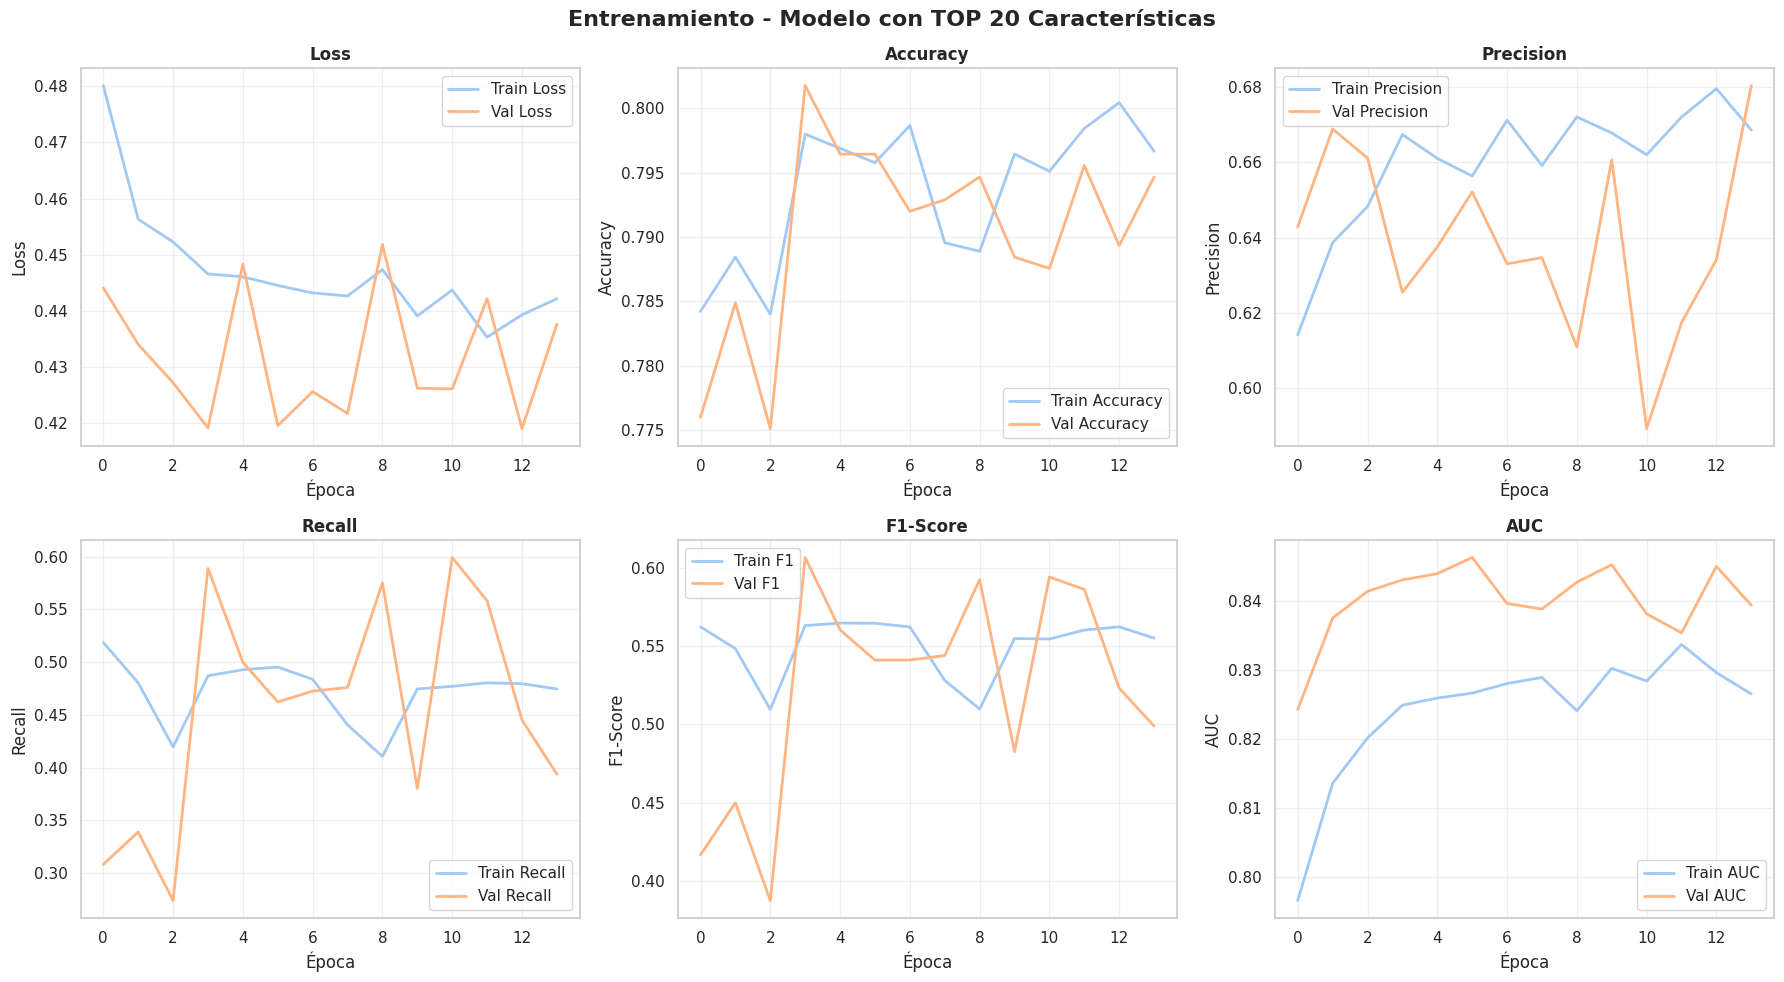


📊 Evaluando en TEST SET...

🎯 Métricas en TEST (TOP 20 características):
   - Loss:      0.4431
   - Accuracy:  0.7804
   - Precision: 0.5886
   - Recall:    0.5775
   - AUC:       0.8244
   - F1-Score:  0.5830 ⭐

📋 Classification Report:
              precision    recall  f1-score   support

    No Churn     0.8481    0.8538    0.8509      1033
       Churn     0.5886    0.5775    0.5830       374

    accuracy                         0.7804      1407
   macro avg     0.7183    0.7157    0.7170      1407
weighted avg     0.7791    0.7804    0.7797      1407



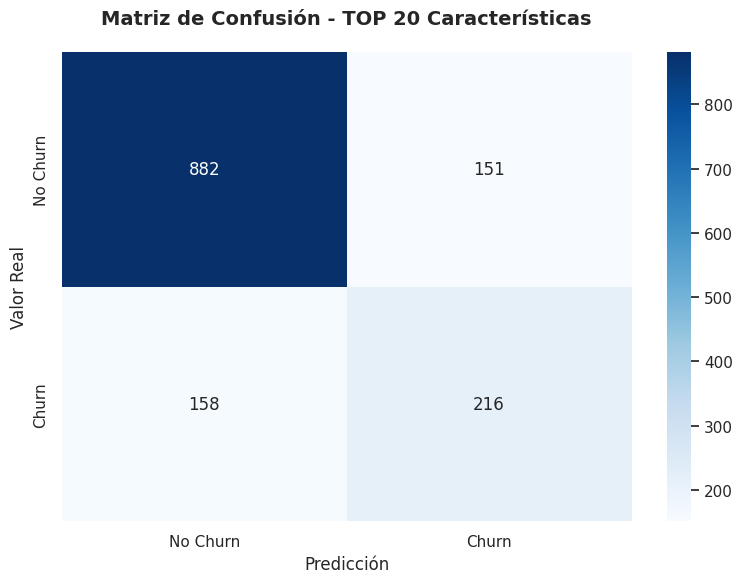


💾 Variables guardadas:
   - model_selected: Modelo entrenado con TOP 20
   - history_selected: Historia del entrenamiento
   - y_pred_selected: Predicciones en test
   - test_results_selected: Métricas en test


In [38]:
# ========== BLOQUE 5: ENTRENAR MEJOR MODELO CON TOP 20 CARACTERÍSTICAS ==========

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("🎯 ENTRENANDO MEJOR MODELO CON TOP 20 CARACTERÍSTICAS")
print("━" * 60)

# Obtener mejores hiperparámetros
best_hp = tuner.get_best_hyperparameters(1)[0]

print(f"\n📋 Configuración del modelo:")
print(f"   - Capas: {best_hp.get('n_layers')}")
for i in range(best_hp.get('n_layers')):
    print(f"   - Capa {i+1}: {best_hp.get(f'units_{i}')} neuronas, {best_hp.get(f'activation_{i}')}, dropout {best_hp.get(f'dropout_{i}'):.1f}")
print(f"   - Optimizador: {best_hp.get('optimizer')}")
print(f"   - Learning rate: {best_hp.get('learning_rate')}")

# Construir modelo con mejores hiperparámetros
model_selected = keras.Sequential()
input_dim = X_train_selected.shape[1]

for i in range(best_hp.get('n_layers')):
    units = best_hp.get(f'units_{i}')
    activation = best_hp.get(f'activation_{i}')
    dropout = best_hp.get(f'dropout_{i}')
    
    if i == 0:
        model_selected.add(layers.Dense(units=units, activation=activation, input_shape=(input_dim,)))
    else:
        model_selected.add(layers.Dense(units=units, activation=activation))
    
    if dropout > 0:
        model_selected.add(layers.Dropout(dropout))

model_selected.add(layers.Dense(1, activation='sigmoid'))

# Compilar
optimizer = keras.optimizers.Adam(learning_rate=best_hp.get('learning_rate')) if best_hp.get('optimizer') == 'adam' else keras.optimizers.RMSprop(learning_rate=best_hp.get('learning_rate'))

model_selected.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc'), F1Score(name='f1_score')]
)

print(f"\n✅ Modelo construido con {X_train_selected.shape[1]} features (TOP 20)")
print(f"📊 Train: {X_train_selected.shape}, Test: {X_test_selected.shape}\n")

# Entrenar
print("🚀 Entrenando modelo...")
history_selected = model_selected.fit(
    X_train_selected, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_f1_score', patience=10, mode='max', restore_best_weights=True, verbose=1)],
    verbose=1
)

# ========== GRÁFICAS DE ENTRENAMIENTO ==========
print("\n📊 Generando gráficas de entrenamiento...")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Entrenamiento - Modelo con TOP 20 Características', fontsize=16, weight='bold')

# Loss
axes[0, 0].plot(history_selected.history['loss'], label='Train Loss', linewidth=2)
axes[0, 0].plot(history_selected.history['val_loss'], label='Val Loss', linewidth=2)
axes[0, 0].set_title('Loss', fontsize=12, weight='bold')
axes[0, 0].set_xlabel('Época')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Accuracy
axes[0, 1].plot(history_selected.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0, 1].plot(history_selected.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0, 1].set_title('Accuracy', fontsize=12, weight='bold')
axes[0, 1].set_xlabel('Época')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Precision
axes[0, 2].plot(history_selected.history['precision'], label='Train Precision', linewidth=2)
axes[0, 2].plot(history_selected.history['val_precision'], label='Val Precision', linewidth=2)
axes[0, 2].set_title('Precision', fontsize=12, weight='bold')
axes[0, 2].set_xlabel('Época')
axes[0, 2].set_ylabel('Precision')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# Recall
axes[1, 0].plot(history_selected.history['recall'], label='Train Recall', linewidth=2)
axes[1, 0].plot(history_selected.history['val_recall'], label='Val Recall', linewidth=2)
axes[1, 0].set_title('Recall', fontsize=12, weight='bold')
axes[1, 0].set_xlabel('Época')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# F1-Score
axes[1, 1].plot(history_selected.history['f1_score'], label='Train F1', linewidth=2)
axes[1, 1].plot(history_selected.history['val_f1_score'], label='Val F1', linewidth=2)
axes[1, 1].set_title('F1-Score', fontsize=12, weight='bold')
axes[1, 1].set_xlabel('Época')
axes[1, 1].set_ylabel('F1-Score')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

# AUC
axes[1, 2].plot(history_selected.history['auc'], label='Train AUC', linewidth=2)
axes[1, 2].plot(history_selected.history['val_auc'], label='Val AUC', linewidth=2)
axes[1, 2].set_title('AUC', fontsize=12, weight='bold')
axes[1, 2].set_xlabel('Época')
axes[1, 2].set_ylabel('AUC')
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ========== EVALUACIÓN EN TEST ==========
print("\n📊 Evaluando en TEST SET...")
y_pred_proba_selected = model_selected.predict(X_test_selected, verbose=0)
y_pred_selected = (y_pred_proba_selected > 0.5).astype(int)

# Métricas
test_results_selected = model_selected.evaluate(X_test_selected, y_test, verbose=0)

print(f"\n🎯 Métricas en TEST (TOP 20 características):")
print(f"   - Loss:      {test_results_selected[0]:.4f}")
print(f"   - Accuracy:  {test_results_selected[1]:.4f}")
print(f"   - Precision: {test_results_selected[2]:.4f}")
print(f"   - Recall:    {test_results_selected[3]:.4f}")
print(f"   - AUC:       {test_results_selected[4]:.4f}")
print(f"   - F1-Score:  {test_results_selected[5]:.4f} ⭐")

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_selected, target_names=['No Churn', 'Churn'], digits=4))

# Matriz de Confusión
cm_selected = confusion_matrix(y_test, y_pred_selected)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_selected, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - TOP 20 Características', fontsize=14, weight='bold', pad=20)
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Predicción', fontsize=12)
plt.tight_layout()
plt.show()

print("\n💾 Variables guardadas:")
print("   - model_selected: Modelo entrenado con TOP 20")
print("   - history_selected: Historia del entrenamiento")
print("   - y_pred_selected: Predicciones en test")
print("   - test_results_selected: Métricas en test")

# 🚀 Bloque 6: Entrenamiento del mejor modelo con todas las características (gráficos)


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🎯 ENTRENANDO MEJOR MODELO CON TODAS LAS CARACTERÍSTICAS (30)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

✅ Modelo construido con 30 features (TODAS)
📊 Train: (5625, 30), Test: (1407, 30)

🚀 Entrenando modelo...
Epoch 1/100
141/141 [==============================] - 1s 3ms/step - loss: 0.4876 - accuracy: 0.7771 - precision: 0.6053 - recall: 0.4780 - auc: 0.7883 - f1_score: 0.5341 - val_loss: 0.4827 - val_accuracy: 0.7876 - val_precision: 0.6710 - val_recall: 0.3562 - val_auc: 0.8505 - val_f1_score: 0.4653
Epoch 2/100
141/141 [==============================] - 0s 1ms/step - loss: 0.4549 - accuracy: 0.7936 - precision: 0.6604 - recall: 0.4688 - auc: 0.8159 - f1_score: 0.5484 - val_loss: 0.4261 - val_accuracy: 0.7876 - val_precision: 0.5710 - val_recall: 0.7295 - val_auc: 0.8493 - val_f1_score: 0.6406
Epoch 3/100
141/141 [==============================] - 0s 1ms/step - loss: 0.4466 - accuracy: 0.7947 - precisio

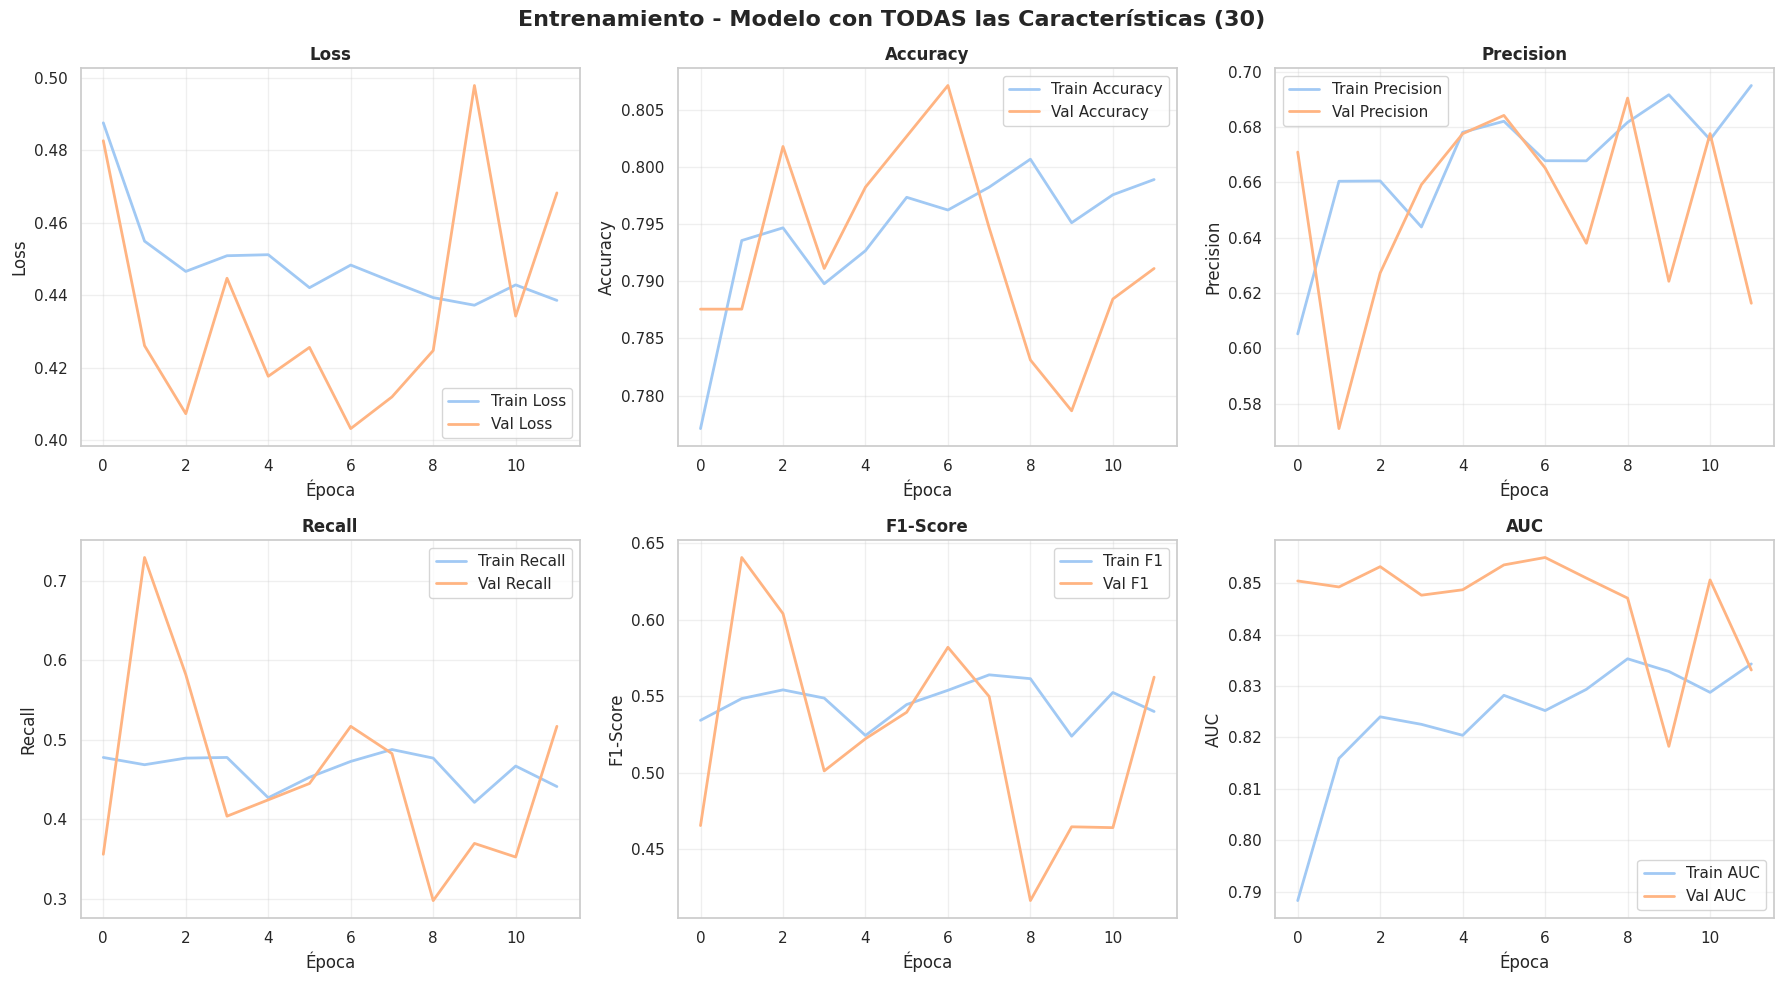


📊 Evaluando en TEST SET...

🎯 Métricas en TEST (TODAS las características):
   - Loss:      0.4594
   - Accuracy:  0.7605
   - Precision: 0.5389
   - Recall:    0.6845
   - AUC:       0.8287
   - F1-Score:  0.6031 ⭐

📋 Classification Report:
              precision    recall  f1-score   support

    No Churn     0.8734    0.7880    0.8285      1033
       Churn     0.5389    0.6845    0.6031       374

    accuracy                         0.7605      1407
   macro avg     0.7062    0.7362    0.7158      1407
weighted avg     0.7845    0.7605    0.7686      1407



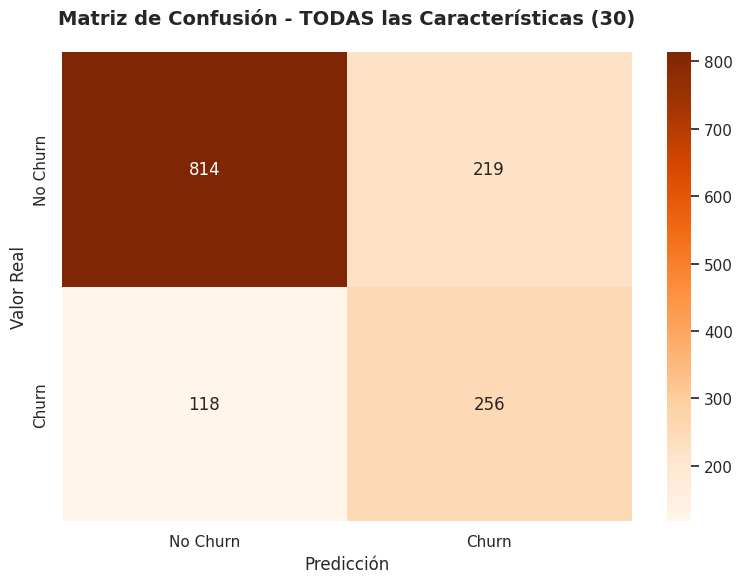


💾 Variables guardadas:
   - model_all: Modelo entrenado con TODAS
   - history_all: Historia del entrenamiento
   - y_pred_all: Predicciones en test
   - test_results_all: Métricas en test


In [39]:
# ========== BLOQUE 6: ENTRENAR MEJOR MODELO CON TODAS LAS CARACTERÍSTICAS ==========

print("\n" + "━" * 60)
print("🎯 ENTRENANDO MEJOR MODELO CON TODAS LAS CARACTERÍSTICAS (30)")
print("━" * 60)

# Construir modelo con MISMA configuración pero input diferente
model_all = keras.Sequential()
input_dim_all = X_train_all.shape[1]

for i in range(best_hp.get('n_layers')):
    units = best_hp.get(f'units_{i}')
    activation = best_hp.get(f'activation_{i}')
    dropout = best_hp.get(f'dropout_{i}')
    
    if i == 0:
        model_all.add(layers.Dense(units=units, activation=activation, input_shape=(input_dim_all,)))
    else:
        model_all.add(layers.Dense(units=units, activation=activation))
    
    if dropout > 0:
        model_all.add(layers.Dropout(dropout))

model_all.add(layers.Dense(1, activation='sigmoid'))

# Compilar con mismos parámetros
optimizer_all = keras.optimizers.Adam(learning_rate=best_hp.get('learning_rate')) if best_hp.get('optimizer') == 'adam' else keras.optimizers.RMSprop(learning_rate=best_hp.get('learning_rate'))

model_all.compile(
    optimizer=optimizer_all,
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc'), F1Score(name='f1_score')]
)

print(f"\n✅ Modelo construido con {X_train_all.shape[1]} features (TODAS)")
print(f"📊 Train: {X_train_all.shape}, Test: {X_test_all.shape}\n")

# Entrenar
print("🚀 Entrenando modelo...")
history_all = model_all.fit(
    X_train_all, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_f1_score', patience=10, mode='max', restore_best_weights=True, verbose=1)],
    verbose=1
)

# ========== GRÁFICAS DE ENTRENAMIENTO ==========
print("\n📊 Generando gráficas de entrenamiento...")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Entrenamiento - Modelo con TODAS las Características (30)', fontsize=16, weight='bold')

# Loss
axes[0, 0].plot(history_all.history['loss'], label='Train Loss', linewidth=2)
axes[0, 0].plot(history_all.history['val_loss'], label='Val Loss', linewidth=2)
axes[0, 0].set_title('Loss', fontsize=12, weight='bold')
axes[0, 0].set_xlabel('Época')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Accuracy
axes[0, 1].plot(history_all.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0, 1].plot(history_all.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0, 1].set_title('Accuracy', fontsize=12, weight='bold')
axes[0, 1].set_xlabel('Época')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Precision
axes[0, 2].plot(history_all.history['precision'], label='Train Precision', linewidth=2)
axes[0, 2].plot(history_all.history['val_precision'], label='Val Precision', linewidth=2)
axes[0, 2].set_title('Precision', fontsize=12, weight='bold')
axes[0, 2].set_xlabel('Época')
axes[0, 2].set_ylabel('Precision')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# Recall
axes[1, 0].plot(history_all.history['recall'], label='Train Recall', linewidth=2)
axes[1, 0].plot(history_all.history['val_recall'], label='Val Recall', linewidth=2)
axes[1, 0].set_title('Recall', fontsize=12, weight='bold')
axes[1, 0].set_xlabel('Época')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# F1-Score
axes[1, 1].plot(history_all.history['f1_score'], label='Train F1', linewidth=2)
axes[1, 1].plot(history_all.history['val_f1_score'], label='Val F1', linewidth=2)
axes[1, 1].set_title('F1-Score', fontsize=12, weight='bold')
axes[1, 1].set_xlabel('Época')
axes[1, 1].set_ylabel('F1-Score')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

# AUC
axes[1, 2].plot(history_all.history['auc'], label='Train AUC', linewidth=2)
axes[1, 2].plot(history_all.history['val_auc'], label='Val AUC', linewidth=2)
axes[1, 2].set_title('AUC', fontsize=12, weight='bold')
axes[1, 2].set_xlabel('Época')
axes[1, 2].set_ylabel('AUC')
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ========== EVALUACIÓN EN TEST ==========
print("\n📊 Evaluando en TEST SET...")
y_pred_proba_all = model_all.predict(X_test_all, verbose=0)
y_pred_all = (y_pred_proba_all > 0.5).astype(int)

# Métricas
test_results_all = model_all.evaluate(X_test_all, y_test, verbose=0)

print(f"\n🎯 Métricas en TEST (TODAS las características):")
print(f"   - Loss:      {test_results_all[0]:.4f}")
print(f"   - Accuracy:  {test_results_all[1]:.4f}")
print(f"   - Precision: {test_results_all[2]:.4f}")
print(f"   - Recall:    {test_results_all[3]:.4f}")
print(f"   - AUC:       {test_results_all[4]:.4f}")
print(f"   - F1-Score:  {test_results_all[5]:.4f} ⭐")

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_all, target_names=['No Churn', 'Churn'], digits=4))

# Matriz de Confusión
cm_all = confusion_matrix(y_test, y_pred_all)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_all, annot=True, fmt='d', cmap='Oranges', cbar=True,
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - TODAS las Características (30)', fontsize=14, weight='bold', pad=20)
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Predicción', fontsize=12)
plt.tight_layout()
plt.show()

print("\n💾 Variables guardadas:")
print("   - model_all: Modelo entrenado con TODAS")
print("   - history_all: Historia del entrenamiento")
print("   - y_pred_all: Predicciones en test")
print("   - test_results_all: Métricas en test")

### 🚀 Bloque 7: Comparación final entre ambos modelos


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📊 COMPARACIÓN FINAL: TOP 20 vs TODAS LAS CARACTERÍSTICAS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📋 Tabla de Comparación:
  Métrica  TOP 20 Features  TODAS (30 Features)  Diferencia    Mejor
     Loss         0.443085             0.459392   -0.016307  ✅ TODAS
 Accuracy         0.780384             0.760483    0.019900 ✅ TOP 20
Precision         0.588556             0.538947    0.049609 ✅ TOP 20
   Recall         0.577540             0.684492   -0.106952  ✅ TODAS
      AUC         0.824406             0.828727   -0.004321  ✅ TODAS
 F1-Score         0.582996             0.603062   -0.020066  ✅ TODAS


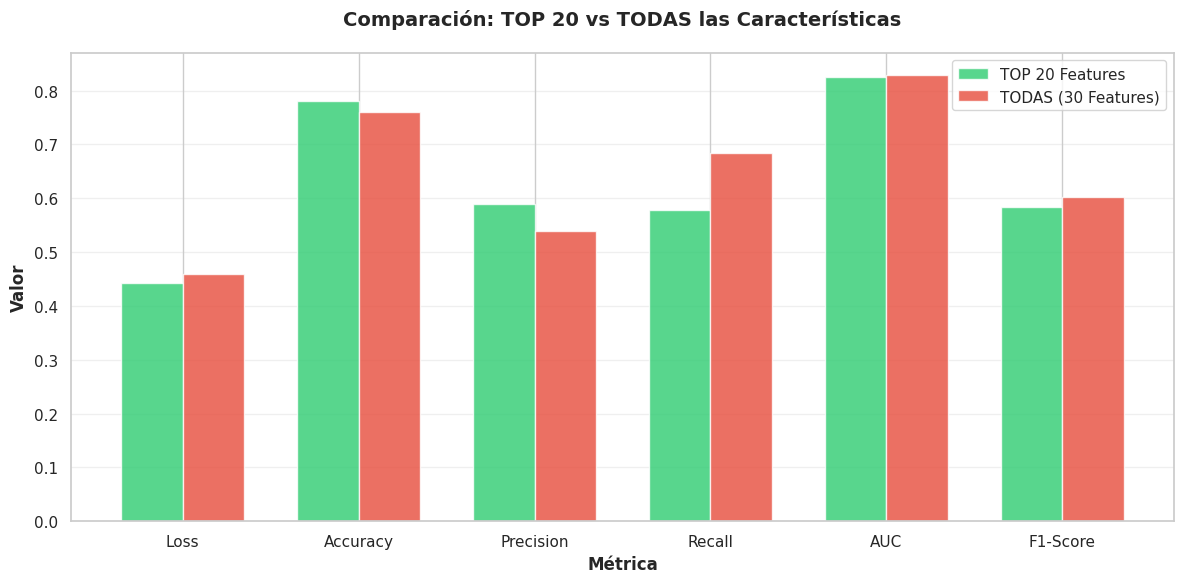


🎯 CONCLUSIÓN:
   ❌ La selección de características EMPEORÓ el modelo
   📉 Pérdida en F1-Score: -0.0201

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


In [40]:
# ========== BLOQUE 7: COMPARACIÓN FINAL ==========

print("\n" + "━" * 80)
print("📊 COMPARACIÓN FINAL: TOP 20 vs TODAS LAS CARACTERÍSTICAS")
print("━" * 80)

# Tabla comparativa
comparison_df = pd.DataFrame({
    'Métrica': ['Loss', 'Accuracy', 'Precision', 'Recall', 'AUC', 'F1-Score'],
    'TOP 20 Features': test_results_selected,
    'TODAS (30 Features)': test_results_all
})

comparison_df['Diferencia'] = comparison_df['TOP 20 Features'] - comparison_df['TODAS (30 Features)']
comparison_df['Mejor'] = comparison_df['Diferencia'].apply(lambda x: '✅ TOP 20' if x > 0 else ('✅ TODAS' if x < 0 else '🟰 Empate'))

print("\n📋 Tabla de Comparación:")
print(comparison_df.to_string(index=False))

# Gráfico comparativo
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(comparison_df['Métrica']))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_df['TOP 20 Features'], width, label='TOP 20 Features', color='#2ecc71', alpha=0.8)
bars2 = ax.bar(x + width/2, comparison_df['TODAS (30 Features)'], width, label='TODAS (30 Features)', color='#e74c3c', alpha=0.8)

ax.set_xlabel('Métrica', fontsize=12, weight='bold')
ax.set_ylabel('Valor', fontsize=12, weight='bold')
ax.set_title('Comparación: TOP 20 vs TODAS las Características', fontsize=14, weight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Métrica'])
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Conclusión
print("\n🎯 CONCLUSIÓN:")
if comparison_df[comparison_df['Métrica'] == 'F1-Score']['Diferencia'].values[0] > 0:
    print("   ✅ La selección de características MEJORÓ el modelo")
    print(f"   📈 Mejora en F1-Score: +{comparison_df[comparison_df['Métrica'] == 'F1-Score']['Diferencia'].values[0]:.4f}")
elif comparison_df[comparison_df['Métrica'] == 'F1-Score']['Diferencia'].values[0] < 0:
    print("   ❌ La selección de características EMPEORÓ el modelo")
    print(f"   📉 Pérdida en F1-Score: {comparison_df[comparison_df['Métrica'] == 'F1-Score']['Diferencia'].values[0]:.4f}")
else:
    print("   🟰 No hubo diferencia significativa")

print("\n" + "━" * 80)

### 🧱 Bloque 8: Stacking con Red Neuronal — Modelos y características

**Modelos base (nivel 0)**
- **Random Forest**  
  `n_estimators=200`, `max_depth=15`, `min_samples_split=10`, `min_samples_leaf=5`,  
  `max_features='sqrt'`, `class_weight='balanced'`, `random_state=42`, `n_jobs=-1`.
- **XGBoost**  
  `n_estimators=200`, `max_depth=6`, `learning_rate=0.1`, `subsample=0.8`,  
  `colsample_bytree=0.8`, `scale_pos_weight=2.7`, `eval_metric='logloss'`, `random_state=42`, `n_jobs=-1`.
- **Logistic Regression (base)**  
  `penalty='l2'`, `C=1.0`, `solver='lbfgs'`, `max_iter=1000`, `class_weight='balanced'`, `random_state=42`.
- **Red Neuronal (base)**  
  `model_all` ya entrenada; salida `sigmoid` → probabilidad de churn.

**Meta-modelo (nivel 1)**
- **Logistic Regression (meta)**  
  `penalty='l2'`, `C=0.5`, `solver='lbfgs'`, `max_iter=1000`, `random_state=42`.  
  Entrena sobre las **probabilidades** de los cuatro modelos base (RF/XGB/LR/NN).

*Fin.*


🏗️ CONSTRUYENDO STACKING CON RED NEURONAL
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📊 PASO 1: Entrenando modelos base...

🌲 Entrenando Random Forest...
   ✅ Random Forest entrenado
🚀 Entrenando XGBoost...
   ✅ XGBoost entrenado
📈 Entrenando Logistic Regression...
   ✅ Logistic Regression entrenado
🧠 Usando Red Neuronal ya entrenada (model_all)...
   ✅ Red Neuronal lista

✅ Todos los modelos base están listos!

📊 PASO 2: Generando predicciones de los modelos base...

✅ Predicciones de TRAIN generadas: (5625, 4)
✅ Predicciones de TEST generadas: (1407, 4)

📊 PASO 3: Entrenando meta-modelo (Logistic Regression)...

✅ Meta-modelo entrenado!

📊 PASO 4: Generando predicciones finales del Stacking...

✅ Predicciones finales generadas!

📊 PASO 5: Evaluando Stacking en TEST SET...

🎯 MÉTRICAS DEL STACKING:
   - Accuracy:  0.7612
   - Precision: 0.5534
   - Recall:    0.5267
   - F1-Score:  0.5397 ⭐
   - AUC:       0.7929

📋 Classification Report:
        

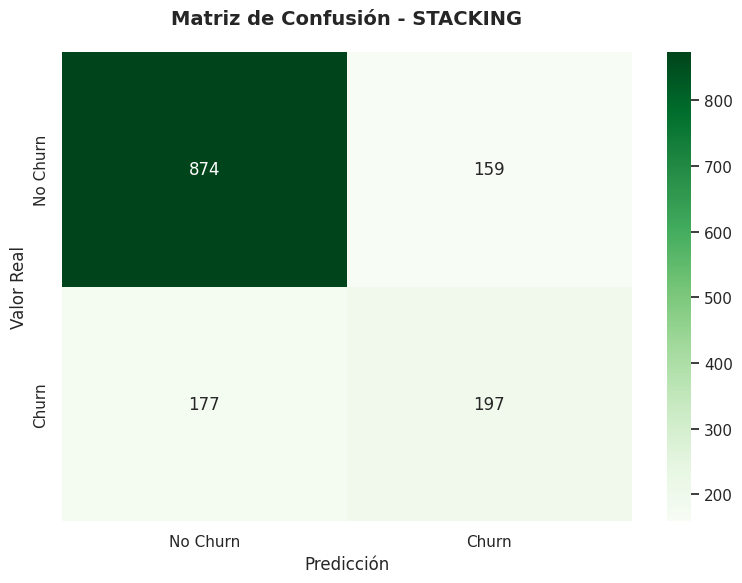


📊 Importancia de cada modelo en el Stacking:

             Modelo  Coeficiente  Importancia_Abs
            XGBoost    10.872330        10.872330
Logistic Regression    -3.716777         3.716777
      Random Forest     2.883916         2.883916
       Red Neuronal    -2.288087         2.288087


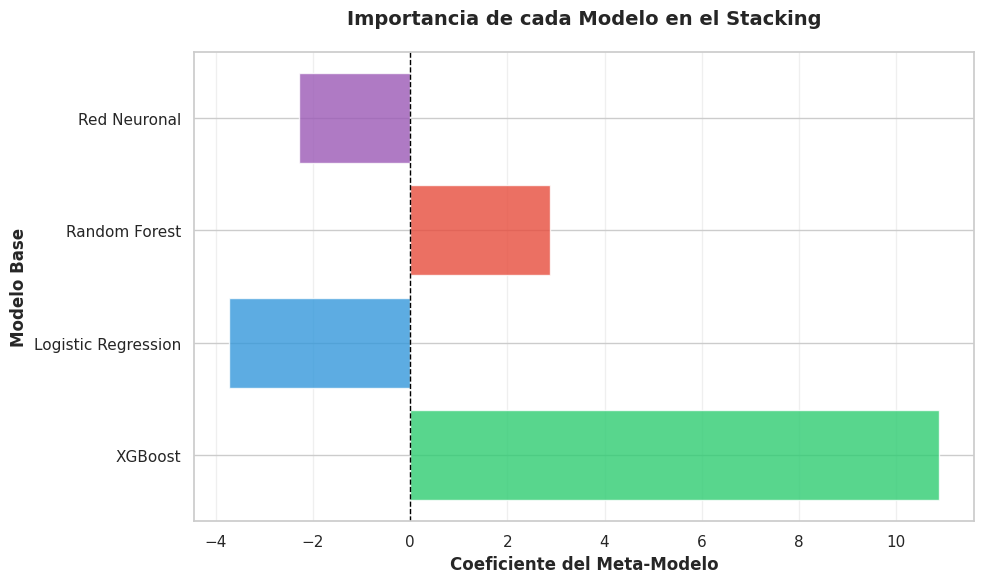


💾 Variables guardadas:
   - rf_stacking, xgb_stacking, lr_stacking: Modelos base
   - meta_model: Meta-modelo del Stacking
   - y_pred_stacking: Predicciones del Stacking
   - stacking_f1, stacking_auc, etc.: Métricas


In [43]:
# ========== BLOQUE 8: STACKING CON RED NEURONAL ==========

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("🏗️ CONSTRUYENDO STACKING CON RED NEURONAL")
print("━" * 80)

# ========== PASO 1: ENTRENAR MODELOS BASE ==========
print("\n📊 PASO 1: Entrenando modelos base...\n")

# 1. Random Forest
print("🌲 Entrenando Random Forest...")
rf_stacking = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_stacking.fit(X_train_all, y_train)
print("   ✅ Random Forest entrenado")

# 2. XGBoost
print("🚀 Entrenando XGBoost...")
xgb_stacking = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=2.7,  # Ratio aproximado 73/27
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)
xgb_stacking.fit(X_train_all, y_train)
print("   ✅ XGBoost entrenado")

# 3. Logistic Regression
print("📈 Entrenando Logistic Regression...")
lr_stacking = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
lr_stacking.fit(X_train_all, y_train)
print("   ✅ Logistic Regression entrenado")

# 4. Red Neuronal (YA ENTRENADA)
print("🧠 Usando Red Neuronal ya entrenada (model_all)...")
print("   ✅ Red Neuronal lista")

print("\n✅ Todos los modelos base están listos!")

# ========== PASO 2: GENERAR PREDICCIONES DE NIVEL 0 ==========
print("\n📊 PASO 2: Generando predicciones de los modelos base...\n")

# Predicciones de probabilidad en TRAIN (para entrenar meta-modelo)
train_pred_rf = rf_stacking.predict_proba(X_train_all)[:, 1].reshape(-1, 1)
train_pred_xgb = xgb_stacking.predict_proba(X_train_all)[:, 1].reshape(-1, 1)
train_pred_lr = lr_stacking.predict_proba(X_train_all)[:, 1].reshape(-1, 1)
train_pred_nn = model_all.predict(X_train_all, verbose=0).reshape(-1, 1)

# Concatenar predicciones de train
X_train_meta = np.hstack([train_pred_rf, train_pred_xgb, train_pred_lr, train_pred_nn])

print(f"✅ Predicciones de TRAIN generadas: {X_train_meta.shape}")

# Predicciones de probabilidad en TEST (para evaluar)
test_pred_rf = rf_stacking.predict_proba(X_test_all)[:, 1].reshape(-1, 1)
test_pred_xgb = xgb_stacking.predict_proba(X_test_all)[:, 1].reshape(-1, 1)
test_pred_lr = lr_stacking.predict_proba(X_test_all)[:, 1].reshape(-1, 1)
test_pred_nn = model_all.predict(X_test_all, verbose=0).reshape(-1, 1)

# Concatenar predicciones de test
X_test_meta = np.hstack([test_pred_rf, test_pred_xgb, test_pred_lr, test_pred_nn])

print(f"✅ Predicciones de TEST generadas: {X_test_meta.shape}")

# ========== PASO 3: ENTRENAR META-MODELO ==========
print("\n📊 PASO 3: Entrenando meta-modelo (Logistic Regression)...\n")

meta_model = LogisticRegression(
    penalty='l2',
    C=0.5,
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

meta_model.fit(X_train_meta, y_train)
print("✅ Meta-modelo entrenado!")

# ========== PASO 4: PREDICCIONES FINALES ==========
print("\n📊 PASO 4: Generando predicciones finales del Stacking...\n")

# Predicciones del stacking
y_pred_stacking_proba = meta_model.predict_proba(X_test_meta)[:, 1]
y_pred_stacking = (y_pred_stacking_proba > 0.5).astype(int)

print("✅ Predicciones finales generadas!")

# ========== PASO 5: EVALUACIÓN ==========
print("\n📊 PASO 5: Evaluando Stacking en TEST SET...\n")

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score

stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
stacking_precision = precision_score(y_test, y_pred_stacking)
stacking_recall = recall_score(y_test, y_pred_stacking)
stacking_f1 = f1_score(y_test, y_pred_stacking)
stacking_auc = roc_auc_score(y_test, y_pred_stacking_proba)

print("🎯 MÉTRICAS DEL STACKING:")
print(f"   - Accuracy:  {stacking_accuracy:.4f}")
print(f"   - Precision: {stacking_precision:.4f}")
print(f"   - Recall:    {stacking_recall:.4f}")
print(f"   - F1-Score:  {stacking_f1:.4f} ⭐")
print(f"   - AUC:       {stacking_auc:.4f}")

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_stacking, target_names=['No Churn', 'Churn'], digits=4))

# Matriz de Confusión
cm_stacking = confusion_matrix(y_test, y_pred_stacking)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Greens', cbar=True,
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - STACKING', fontsize=14, weight='bold', pad=20)
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Predicción', fontsize=12)
plt.tight_layout()
plt.show()

# ========== PASO 6: IMPORTANCIA DE MODELOS BASE EN STACKING ==========
print("\n📊 Importancia de cada modelo en el Stacking:\n")

# Coeficientes del meta-modelo (indican importancia)
coef = meta_model.coef_[0]
model_names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Red Neuronal']

importance_df = pd.DataFrame({
    'Modelo': model_names,
    'Coeficiente': coef,
    'Importancia_Abs': np.abs(coef)
}).sort_values('Importancia_Abs', ascending=False)

print(importance_df.to_string(index=False))

# Gráfico de importancia
plt.figure(figsize=(10, 6))
colors = ['#2ecc71', '#3498db', '#e74c3c', '#9b59b6']
bars = plt.barh(importance_df['Modelo'], importance_df['Coeficiente'], color=colors, alpha=0.8)
plt.xlabel('Coeficiente del Meta-Modelo', fontsize=12, weight='bold')
plt.ylabel('Modelo Base', fontsize=12, weight='bold')
plt.title('Importancia de cada Modelo en el Stacking', fontsize=14, weight='bold', pad=20)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💾 Variables guardadas:")
print("   - rf_stacking, xgb_stacking, lr_stacking: Modelos base")
print("   - meta_model: Meta-modelo del Stacking")
print("   - y_pred_stacking: Predicciones del Stacking")
print("   - stacking_f1, stacking_auc, etc.: Métricas")

# 🧱 Bloque 9: Comparación final


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🏆 COMPARACIÓN FINAL: RED NEURONAL vs STACKING
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📋 Tabla Comparativa:
  Métrica  Red Neuronal  Stacking  Diferencia        Ganador
 Accuracy      0.760483  0.761194    0.000711       🟰 Empate
Precision      0.538947  0.553371    0.014423     🏆 Stacking
   Recall      0.684492  0.526738   -0.157754 🏆 Red Neuronal
 F1-Score      0.603062  0.539726   -0.063336 🏆 Red Neuronal
      AUC      0.828727  0.792905   -0.035822 🏆 Red Neuronal


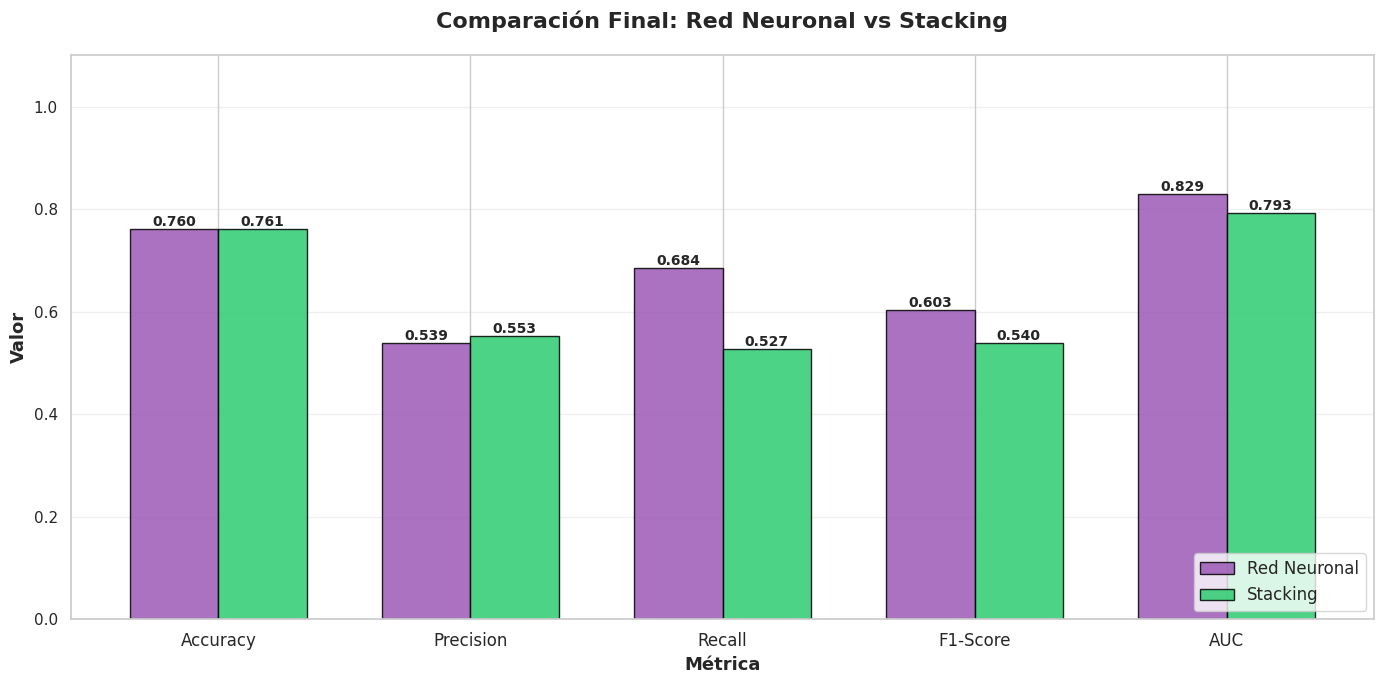


🎯 ANÁLISIS FINAL:

   🏆 GANADOR: RED NEURONAL
   📈 Ventaja en F1-Score: +0.0633 (6.33%)

   ✅ La Red Neuronal optimizada con Hyperband es superior
   ✅ El deep learning captura mejor las interacciones complejas

━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━

📊 RESUMEN EJECUTIVO:

1. Red Neuronal (Hyperband):
   - F1-Score: 0.6031
   - AUC: 0.8287
   - Arquitectura: 3 capas, LR=0.01

2. Stacking Ensemble:
   - F1-Score: 0.5397
   - AUC: 0.7929
   - Modelos: RF + XGBoost + LogReg + Red Neuronal

3. Modelo más importante en Stacking:
   - XGBoost (coef: 10.8723)

━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━


In [44]:
# ========== BLOQUE 9: COMPARACIÓN FINAL ==========

print("\n" + "━" * 80)
print("🏆 COMPARACIÓN FINAL: RED NEURONAL vs STACKING")
print("━" * 80)

# Métricas de la Red Neuronal (ya calculadas en test_results_all)
nn_accuracy = test_results_all[1]
nn_precision = test_results_all[2]
nn_recall = test_results_all[3]
nn_auc = test_results_all[4]
nn_f1 = test_results_all[5]

# Crear tabla comparativa
comparison_final = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'],
    'Red Neuronal': [nn_accuracy, nn_precision, nn_recall, nn_f1, nn_auc],
    'Stacking': [stacking_accuracy, stacking_precision, stacking_recall, stacking_f1, stacking_auc]
})

comparison_final['Diferencia'] = comparison_final['Stacking'] - comparison_final['Red Neuronal']
comparison_final['Ganador'] = comparison_final['Diferencia'].apply(
    lambda x: '🏆 Stacking' if x > 0.001 else ('🏆 Red Neuronal' if x < -0.001 else '🟰 Empate')
)

print("\n📋 Tabla Comparativa:")
print(comparison_final.to_string(index=False))

# Gráfico comparativo
fig, ax = plt.subplots(figsize=(14, 7))
x = np.arange(len(comparison_final['Métrica']))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_final['Red Neuronal'], width, 
               label='Red Neuronal', color='#9b59b6', alpha=0.85, edgecolor='black')
bars2 = ax.bar(x + width/2, comparison_final['Stacking'], width, 
               label='Stacking', color='#2ecc71', alpha=0.85, edgecolor='black')

# Agregar valores encima de las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10, weight='bold')

ax.set_xlabel('Métrica', fontsize=13, weight='bold')
ax.set_ylabel('Valor', fontsize=13, weight='bold')
ax.set_title('Comparación Final: Red Neuronal vs Stacking', fontsize=16, weight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(comparison_final['Métrica'], fontsize=12)
ax.legend(fontsize=12, loc='lower right')
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

# ========== ANÁLISIS DE GANADOR ==========
print("\n🎯 ANÁLISIS FINAL:\n")

f1_diff = comparison_final[comparison_final['Métrica'] == 'F1-Score']['Diferencia'].values[0]

if f1_diff > 0.01:
    print(f"   🏆 GANADOR: STACKING")
    print(f"   📈 Mejora en F1-Score: +{f1_diff:.4f} ({f1_diff*100:.2f}%)")
    print(f"\n   ✅ El Stacking superó a la Red Neuronal")
    print(f"   ✅ La combinación de modelos captura mejor los patrones de churn")
elif f1_diff < -0.01:
    print(f"   🏆 GANADOR: RED NEURONAL")
    print(f"   📈 Ventaja en F1-Score: +{abs(f1_diff):.4f} ({abs(f1_diff)*100:.2f}%)")
    print(f"\n   ✅ La Red Neuronal optimizada con Hyperband es superior")
    print(f"   ✅ El deep learning captura mejor las interacciones complejas")
else:
    print(f"   🟰 EMPATE TÉCNICO")
    print(f"   📊 Diferencia en F1-Score: {f1_diff:.4f} (insignificante)")
    print(f"\n   ✅ Ambos modelos tienen rendimiento similar")
    print(f"   ✅ Elegir según recursos computacionales y mantenibilidad")

print("\n━" * 80)

# ========== RESUMEN EJECUTIVO ==========
print("\n📊 RESUMEN EJECUTIVO:\n")
print(f"1. Red Neuronal (Hyperband):")
print(f"   - F1-Score: {nn_f1:.4f}")
print(f"   - AUC: {nn_auc:.4f}")
print(f"   - Arquitectura: {best_hp.get('n_layers')} capas, LR={best_hp.get('learning_rate')}")

print(f"\n2. Stacking Ensemble:")
print(f"   - F1-Score: {stacking_f1:.4f}")
print(f"   - AUC: {stacking_auc:.4f}")
print(f"   - Modelos: RF + XGBoost + LogReg + Red Neuronal")

print(f"\n3. Modelo más importante en Stacking:")
best_model_idx = importance_df['Importancia_Abs'].idxmax()
best_model_name = importance_df.loc[best_model_idx, 'Modelo']
print(f"   - {best_model_name} (coef: {importance_df.loc[best_model_idx, 'Coeficiente']:.4f})")

print("\n━" * 80)